# Анализ закономерностей продаж компьютерных игр через интернет-магазин

**Вступление**  
Нам предоставлены исторические данные о продажах игр, датах их релиза, платформах, на которые были выпущены, регионах, продаж, оценках пользователей и критиков и так далее.  Основное заинтересованное лицо - интернет-магазин, который продаёт компьютерные игры по миру. Основная цель - сформулировать закономерности (ключевые моменты), которые позволят точнее и эффективнее планировать политику продаж игр в последующем периоде.  

В процессе работы: 
- ознакомимся с данными
- проведём предобработку данных (сменим регистр, проверим на дубликаты, измененим типов данных на корректный и обработаем пропуски)
- проведём исследовательский анализ данных (выпуск игр по годам, продажи по платформам и т.д.) 
- определим актуальный период для анализа и основные платформы, посмотрим на глобальные продажи игр по платформам, 
- оценим влияние оценок критиков и пользователей 
- посмотрим на распределение игр по жанрам
- соберём портрет типичного пользователя в разрезе по регионам 
- сформулируем и проверим гипотезы о равенстве средних пользовательских рейтингов игр для Xbox One и PC, в жанрах Action и Sports
- сделаем выводы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st

## Знакомство с данными

In [2]:
main_df = pd.read_csv('C:\\Users\\Marat\\Documents\\Marat\\data_analyse\\projects\\analysis_games\\games.csv')

In [3]:
main_df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- 11 столбцов, 16715 строк.  
- Есть нарушение в стилистике названий столбцов - нужно исправить.    
- Ключевой столбец - `Name`. В этом столбце имеются пропуски - проверить, почему? Также: есть ли дубликаты?  
- Столбец `Platform` заполнен полностью (есть ли неявные дубликаты)  
- `Year_of_Release` - есть пропуски и тип данных float (возможно будет лучше DateTime)  
- `Genre` - есть пропуски (всего два) - насколько это важно? Также проверить на неявные дубликаты.  
- Очень важные столбцы для анализа - `NA_sales`, `EU_sales`, `JP_sales` - пропусков нет (это хорошо)  
- `Critic_Score` - много пропусков. Важно ли это? Возможно, главное, чтобы были оценки для игр с наибольшим количеством проданных копий.  
- То же самое по `User_Score` и `Rating`. Кроме того, у `User_Score` тип данных object - почему не float?

## Предобработка данных

### Сменить регистр столбцов

In [5]:
# меняем регистр названий столбцов
main_df.columns = main_df.columns.str.lower()

In [6]:
main_df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Наименование столбцов приведено к нижнему регистру.

### Проверка на явные дубликаты

In [7]:
main_df.duplicated().sum()

0

Явных дубликатов не обнаружено.

### Смена типа данных и обработка пропусков.

#### Столбец `name` - название игры

In [8]:
# проверим пропуски
main_df[main_df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего 2 старые игры (1993 года) игры, по которым нет информации ни по жанрам, ни по рейтингам. Кроме того, было продано количество копий (причём основной объём приходился на отдельно взятые регионы). Вполне можно просто удалить эти строки.

In [9]:
# удаляем пропуски в  столбце 'name'
main_df = main_df.dropna(subset=['name'])
# проверим
main_df['name'].isna().sum()

0

Также стоит отметить, что обработались и пропуски в столбце `genre`

#### Столбец `year_of_release` - Год релиза

In [10]:
# проверяем пропуки в столбце "год релиза"
main_df.loc[main_df['year_of_release'].isna()].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


269 строк из 16713, где в столбце 'year_of_release' отсутствуют значения.
Теоретически можно было бы в некоторых случаях ориентироваться на год, указанный в названии игры, но не всегда этот год совпадает с годом релиза игры (наприме, Madden NFL 2004 вышла в 2003год).
Проверим, какую долю суммарно продажи этих игр знимают по отношению ко всем проданным играм во всём датасете Но будем помнить, что помним, что в разные годы "нормальное" количество проданных игр за год могло быть разным.

In [11]:
# проверяем долю (по суммарным продажам по каждому региону) отстутвующих строк в графе "год релиза" 
for region in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    share = main_df.loc[main_df['year_of_release'].isna(), region].sum() / main_df[region].sum()    
    print('доля всех продаж с неизвестных годом по отношению ко всем продажам за всё время по {}:'.format(region), '{0:.2f}%'.format(share*100))

доля всех продаж с неизвестных годом по отношению ко всем продажам за всё время по na_sales: 1.34%
доля всех продаж с неизвестных годом по отношению ко всем продажам за всё время по eu_sales: 1.01%
доля всех продаж с неизвестных годом по отношению ко всем продажам за всё время по jp_sales: 0.52%
доля всех продаж с неизвестных годом по отношению ко всем продажам за всё время по other_sales: 1.09%


Удалим строки с неизвестным годом релиза

In [12]:
# удаляем эти пропуски
main_df = main_df.dropna(subset=['year_of_release'])
# проверим
main_df['year_of_release'].isna().sum()

0

Изменим тип данных в графе `year_of_release` (остались только целые года)

In [13]:
main_df['year_of_release'] = main_df['year_of_release'].astype('int')

In [14]:
main_df['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16444, dtype: int32

#### Неявные дубликаты в столбце `platform`

In [15]:
main_df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Неявных дубликатов не видно. 

#### Неявные дубликаты в столбце `genre`

In [16]:
main_df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Неявных дубликатов снова не наблюдается.

#### Возможные дубликаты в столбце `name`

In [17]:
main_df['name'].value_counts()

Need for Speed: Most Wanted               12
LEGO Marvel Super Heroes                   9
Ratatouille                                9
FIFA 14                                    9
Terraria                                   8
                                          ..
Loving Life with Hello Kitty & Friends     1
Scrabble (Others sales)                    1
Viva Pinata: Party Animals                 1
Sands of Destruction                       1
Haitaka no Psychedelica                    1
Name: name, Length: 11426, dtype: int64

Предполагаемые дубликаты имеются. Например, Need for Speed: Most Wanted повторяются 12 раз. На примере этой игры, посмотрим подробнее.

In [18]:
main_df[main_df['name']== 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Т.е. предполагаемые дубликаты в графе name за счёт разных платформ и годов релиза на них (+ возможные ремейки).
Соответственно как-то обрабатывать эти дубликаты, собирая в одну строчку, смысла нет (по сути, они ими не являются).

#### Столбцы `critic_score` и `user_score` - обработка пропусков. 

Поскольку суть данных столбцов схожа, т.е. пропуски имеет смысл обрабатывать параллельно

In [19]:
print('пропуски в столбце `оценка критиков`:' ,main_df['critic_score'].isna().sum())
print('пропуски в столбце `оценка пользователей`:',main_df['user_score'].isna().sum())

пропуски в столбце `оценка критиков`: 8461
пропуски в столбце `оценка пользователей`: 6605


Прежде, чем отрабатывать пропуски, посмотрим сколько строк занимают ячейки с аббревиатурой `tbd` ('To Be Determined', т.е. игры, чей рейтинг не определён на данный момент, данные не собраны пока что). Такие ячейки, если их много, пока имеет смысл обработать также, как и NaN (а NaN для начала стоит обработать, как и `critic_score` до этого).

In [20]:
# считаем количество строк с "tbd" в графе 'user_score'
main_df.loc[main_df['user_score'] == 'tbd', 'user_score'].count()

2376

Заменим для удобства tbd на NaN.

In [21]:
# меняем tbd на nan
main_df['user_score'] = main_df['user_score'].where(main_df['user_score'] != 'tbd', float('nan'))
print(main_df['user_score'].isna().sum())

8981


Итого 8981 пропуск в оценках пользователей.

Отработаем пропуски и для `critic_score`, и для `user_score`.<br>
Так как  природа пропусков может быть неоднозначна, а одни и те же игры могут иметь могут иметь разные отзывы на разных платформах или будучи в разных версиях (т.е. оценка разных игр на разных платформах или в разных версиях может зависеть от разных факторов), заполнять их по средним или другим расчётным значениям нецелесообразно. 
Поэтому эти пропуски заполним "заглушками", а именно числовым значением, которые выпадает за пределы значений исходных оценок пользователей и критиков. Предварительно. на всякий случай, посмотрим на минимальные и максимальные значения у критиков и пользователей.

In [22]:
# после отработки `tbd` остался тип object. Сменим на float
main_df['user_score'] = main_df['user_score'].astype(float)

In [23]:
# проверим минимальные и максимальные оценки критиков и пользователей
print('минимальная оценка критиков:', main_df.loc[(~main_df['critic_score'].isna()), 'critic_score'].min())
print('максимальная оценка критиков:', main_df.loc[(~main_df['critic_score'].isna()), 'critic_score'].max())
print('минимальная оценка пользователей:', main_df.loc[(~main_df['user_score'].isna()), 'user_score'].min())
print('максимальная оценка пользователей:', main_df.loc[(~main_df['user_score'].isna()), 'user_score'].max())


минимальная оценка критиков: 13.0
максимальная оценка критиков: 98.0
минимальная оценка пользователей: 0.0
максимальная оценка пользователей: 9.7


Заменим пропуски на -1

In [24]:
# заменим NaN на "заглушки", а именно на -1
main_df['critic_score'] = main_df['critic_score'].fillna(-1)
main_df['user_score'] = main_df['user_score'].fillna(-1)
print('пропуски в столбце `оценка критиков` после обработки:' ,main_df['critic_score'].isna().sum())
print('пропуски в столбце `оценка пользователей` после обработки:',main_df['user_score'].isna().sum())

пропуски в столбце `оценка критиков` после обработки: 0
пропуски в столбце `оценка пользователей` после обработки: 0


Итого:  
Пропуски в столбцах `critic_score` (8461 пропуск) и `user_score` (8981 пропуск) заменены на *-1* - при дальнейшем анализе будем это учитывать и отфильтровывать.

#### Пропуски в столбце `rating`
Проверим пропуски в графе возрастной рейтинг.

In [25]:
main_df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Возрастной рейтинг организации ESRB располагается в следующем порядке: EC, E, E10+, T, M, AO. Их и будем брать за основу.
Рейтинг K-A - устаревший. На данный момент приравнен к E. Поэтому просто заменим K-A на E

In [26]:
print(main_df.loc[main_df['rating'] == 'K-A', 'name'].count())
main_df['rating'] = main_df['rating'].where(main_df['rating'] != 'K-A', 'E')
main_df.loc[main_df['rating'] == 'K-A', 'name'].count()

3


0

Рейтинг RP (рейтинг ожидается) не будем учитывать в расчёте для пропущенных значений, т.к. по сути не является готовым рейтингом. Проверим сколько таких строк и, если их немного, то просто заменим на NaN, чтобы тоже отработать как пропуск.

In [27]:
main_df.loc[main_df['rating'] == 'RP', 'name'].count()

1

In [28]:
main_df['rating'] = main_df['rating'].where(main_df['rating'] != 'RP', float('nan'))

Поскольку рейтинг ESRB распространяется на США и Канаду, обработать по каким-то средним рейтингам отсутствующие значения нельзя, т.к. игры могут выпускаться для разных рынков (где могут быть и свои варианты рейтингов, и своя шкала).
Но посмотрим, сколько таких строк, с отсутствующим рейтингом.

In [29]:
print('количество пропущенных значений в графе `рейтинг`:' ,main_df['rating'].isna().sum())

количество пропущенных значений в графе `рейтинг`: 6677


Однако, для удобства дальнейшего анализа и группировок по рейтингу (где, он есть) добавим столбец (чтобы не портить исходный столбец), где к рейтингу будет добавлен числовой индекс. А там, где рейтинг отсутствует, поставим заглушку "unknown" (которые далее будем отфильтровывать)

In [30]:
ESRB = ['EC', 'E', 'E10+', 'T', 'M', 'AO']
# Добавляем столбец id_rating
def id_rat(rating):
    if pd.isna(rating) == False:
        return str(ESRB.index(rating)) + '_' + rating
    else:
        return 'unknown'

main_df['id_rating'] = main_df['rating'].apply(id_rat)
print('количество пропущенных значений в новом столбце `id_rating`:' ,main_df['id_rating'].isna().sum())
print('количество строк с `unknown` в новом столбце `id_rating`:', main_df.loc[main_df['id_rating'] == 'unknown', 'id_rating'].count())
main_df.loc[main_df['id_rating'] != 'unknown', 'id_rating'].tail(10)

количество пропущенных значений в новом столбце `id_rating`: 0
количество строк с `unknown` в новом столбце `id_rating`: 6677


16681       1_E
16688       3_T
16692       4_M
16695       1_E
16696       3_T
16697       1_E
16698       1_E
16702    2_E10+
16704       1_E
16706       3_T
Name: id_rating, dtype: object

Итого, Мы сделали дополнительный столбец id_rating, куда занесли все рейтинги с добавлением числового индекса для каждого рейтинга, чтобы иметь возможность группировать по увеличению возрастного рейтинга, при этом заменив пропуски графы rating на unknown в новой графе

In [31]:
main_df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,id_rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,1_E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1_E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,1_E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN,unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NaN,unknown
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,1_E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,1_E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,1_E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NaN,unknown


### Суммарные продажи
Добавим дополнительный столбец с суммарными продажами 

In [32]:
# собираем столбец "суммарные продажи"
main_df['total_sales'] = main_df['na_sales'] + main_df['eu_sales'] + main_df['jp_sales'] + main_df['other_sales']
main_df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,id_rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,1_E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1_E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,1_E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,1_E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,1_E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,1_E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NaN,unknown,28.31


**Итого:**
- изменён регистр столбцом (приведены к нижнему регистру)
- проверены явные дубликаты, таких дубликатов не обнаружено.
- удалены строки с отсутствующими данными по играм (в том числе отсутствовали названия) - таких строк было 2 штуки (параллельно отработались пропуски и в столбце "жанр"
- в графе `year_of_Release` удалены пропуски (269 строк). Информация в этих строках занимала незначительный объём в общих соответствующих суммарных значениях, поэтому их удаление некритично.
- проверены дубликаты в столбцах `platform` и `genre` - дубликатов не обнаружено
- в графе `name` повторяющиеся значения имеются, но они получаются из-за выпуска одних и тех же игр на разных платформах, выпуска разных версий (обновлённых) игры в разные годы и т.д.
- в столбцах `critic_score` и `user_score` имеются пропуски (8461 и 8981 строки соответственно). Просто удалить пропуски или заменить на расчётные данные нельзя, поэтому заменим на заглушки *-1*.
-  Обнаружены пропуски и по графе `rating` - 6677. Также пропуски заменить на какие-то расчётные/ средние значения нельзя. Поэтому в новом столбце `id_rating` (где к рейтингу добавлен числовой индекс для удобства группировки) заменены на `unknown` 

## Исследовательский анализ данных

### Выпуск игр в разные годы

In [33]:
# сделаем сводную таблицу с группировкой по годам
game_year = main_df.pivot_table(index='year_of_release', values='name', aggfunc='count')
game_year.columns = ['numbre_of_game']
game_year

,numbre_of_game
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


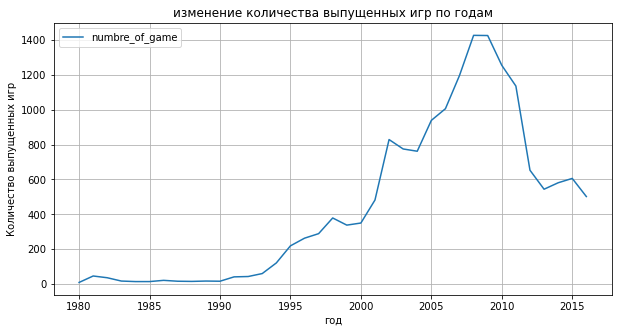

In [34]:
# добавляем график изменения количества выпущенных игр по годам
game_year.plot(kind='line', y='numbre_of_game', grid=True, figsize=(10, 5), title = 'изменение количества выпущенных игр по годам')
plt.ylabel('Количество выпущенных игр')
plt.xlabel('год')
plt.show()

По графику чётко видно, что примерно до 2008-2009 года количество выпускаемых игр в год практически постоянно росло. Причём, начиная примерно с 2000г, рост резко усилился. Одновременно с этим наблюдается не менее резкое падение количества выпущенных игр с 2008-2009г вплоть до уровня 2001-2002 годов. Сложно сказать, с чем это может быть связано в таком длительном периоде. Возможно, отчасти в начале сказался финансовый кризис 2008 года.

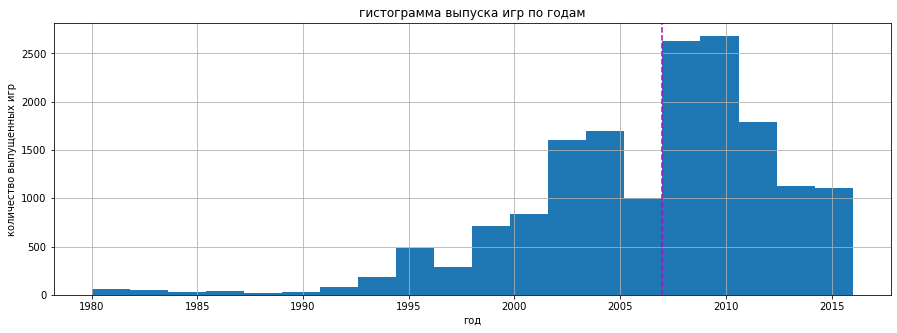

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [35]:
main_df['year_of_release'].hist(bins=20, figsize=(15, 5))
plt.axvline(x = main_df['year_of_release'].median(), color = 'm', linestyle = 'dashed')
plt.title('гистограмма выпуска игр по годам')
plt.ylabel('количество выпущенных игр')
plt.xlabel('год')
plt.show()

main_df['year_of_release'].describe()

По обоим графикам сделать наблюдения, что с точки зрения количества выпускаемых игр, основной объём игр выходил в период с 2003 года по 2010 год. При этом также важные для анализа данные можно видеть и в период с 2000 до 2016.

### Продажи по платформам по годам

In [36]:
platform_sales = main_df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
platform_sales

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Итак, за всё время наиболее популярными платформами с точки зрения продаж игр стали: `PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS`.  
Посмотрим, на динамику общих продаж игр по каждой из этих платформ.

In [37]:
# сделам список с популярными платформами для дальнейших расчётов  
platform_list = platform_sales.index[0:6].tolist()
platform_list

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

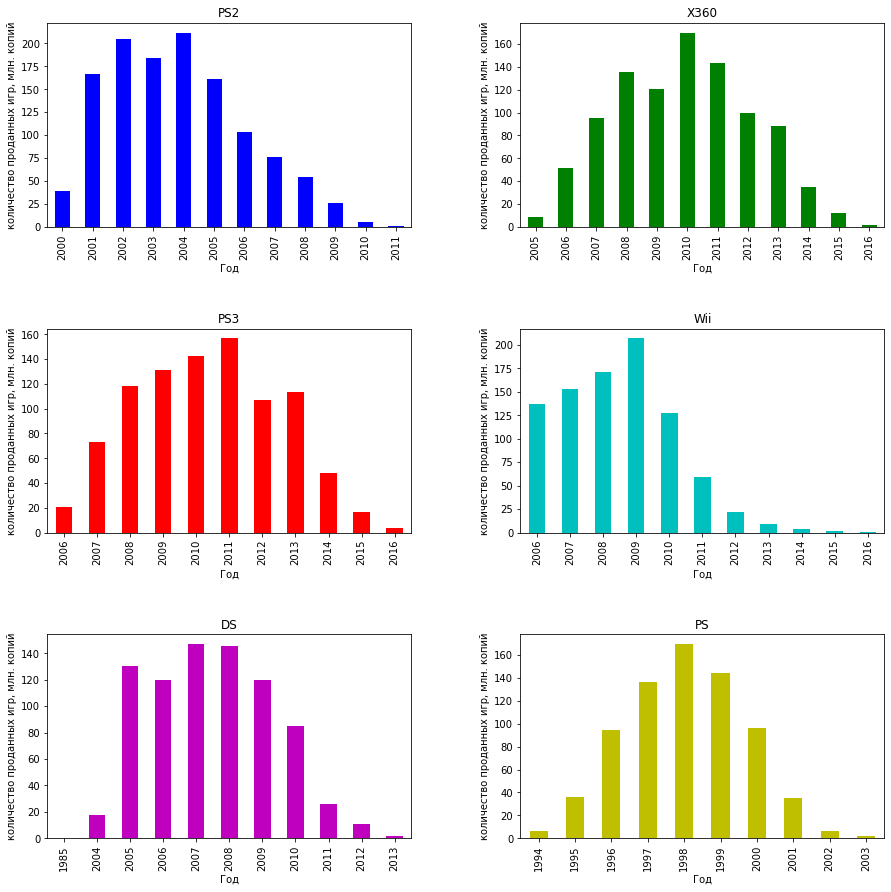

In [38]:
# сделаем графики для топ-6

title_inx = 0
serie = 1
clr = ['b', 'g', 'r','c', 'm', 'y']

for plat in platform_list:
    ax = plt.subplot(3, 2, serie)
    platform_group = main_df.query('platform == @plat').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    platform_group.columns = ['sales']
    platform_group.plot(kind='bar', y='sales', ax=ax, figsize=(15, 15), color=clr[title_inx], legend=False)
    plt.title(platform_list[title_inx])
    plt.xlabel('Год')
    plt.ylabel('количество проданных игр, млн. копий')
    title_inx += 1
    serie += 1
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

    

У платформы DS есть странное значение, а наличие проданных игр в 1985 году (при том, что появилась приставка только в 2004 году). Посмотрим, что это за игры:

In [39]:
main_df.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,id_rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1.0,-1.0,NaN,unknown,0.02


Одна единственная игра "Strongest Tokyo University Shogi DS". Не очень понятно, как она сюда попала. Возможно она предназначалась для другой платформы, но из-за DS в названии попала в игры для DS. Продажи у игр совсем небольшие - всего 20 тысяч копий. Информации об отзывах и рейтингах нет. Предполагаю, что эту строку, как строку с ошибкой и незначительными данными можно удалить (тем более, что игра старая)

In [40]:
# На всякий случай проверим, что строка с такой игрой одна.
main_df[main_df['name'] == 'Strongest Tokyo University Shogi DS']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,id_rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1.0,-1.0,NaN,unknown,0.02


In [41]:
main_df = main_df.loc[main_df['name'] != 'Strongest Tokyo University Shogi DS']
len(main_df)

16443

Строка с этой загадочной игрой удалена.

Итого, можно сделать наблюдение, что:
- среди топ-6 платформ, по которым было продано больше всего копий игр за всё время, пиковые продажи занимают, как правило 5-7 лет.
- продажи в этот период составляют примерно в среднем от 80 до 200-220 млн. копий (здесь необходимо необходимо учитывать, что пик той или иной платформы приходился на разные годы, для которых "нормальные" объёмы продаж игр были разные, поэтому минимумы  и максимумы для разных платформ разные).
- при этом в большинстве случаев распрежедение количества проданных игр поодит на нормальное распределение, что объяснимо: когда приставка только выходит на рынок, покупатели с ней только знакомятся (количесвто владельцев ограничено) при этом игр, выпущенных на новую платформу ещё мало игр(по графикам осключением стало Nintendo Wii - большое количество проданных игр уже на старте - видимо, из-за уникальных возможностей и соотвественно эксклюзивных игр только для Wii). Затем в течение последующих 2-3 лет популярность платформы растёт, а разработчики выпускают свои игры или адаптируют старые к текущей платформе. А ещё через 3-5 лет актульность текущей падает - пользователи переходят на новые платформы (соотвественно продажи на старые падают)
- по графикам видно, что в целом средний срок "жизни" платформы занимает около 10-12 лет

### Выбор актуального периода и его топовые платформы 
Как ранее можно было видеть, основное количество игр было выпущено в период с 2000 по 2016г.  
Но с учётом, того, что особый интерес предтавляют именно наиболее "живые" платформы (до их "угасания") с пиковыми продажими игр, то имеет смысл брать период за последние 4 (максимум 5) лет. Т.е., например, 2012-2016 год (особенно учитывая, что данные за 2016год ещё не полные). Его и выберем в качестве "актуального" периода. 

In [42]:
# сдлаем срез на актуальный период 2011-2016год
actual_df = main_df.query('2012 <= year_of_release <= 2016')
len(actual_df)

2886

Данный период охватывает чуть более 4 тысяч выпущенных игр.

In [43]:
# сводная таблица с группировкой по платформам в актуальном периоде
act_platform_sales = actual_df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
act_platform_sales

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


Видно, что за последние 5 неполных лет в лидерах по продажам игр находятся PS4, PS3, X360, 3DS, XOne и WiiU (что объяснимо, т.к. это наиболее актуальные платформы на выбранный период). Что интересно, за весь период наблюдений исходного датасета абсолютным лидером является PS2 - 1233.56 млн. копий игр, при этом в последние 5 лет платформа уже не попала. PS2 была выпущена в 2000 году, и выбранный период - как раз период, на начало которого, условно говоря, пришлась "смерть" этой старой платформы (те самые 10-11 лет). Кстати, интересно посмотреть, сколько из актуальных платформ находятся в общем ТОП-6 за всю "историю наблюдений"

In [44]:
# посмотрим, какие платформы остались общего ТОП-6
top_platform = act_platform_sales.index[0:6].tolist()
for plat in top_platform:
    if plat in platform_list:
        print(plat)

PS3
X360


Т.е. к 2016 году только 2 актуальные платформы PS3 и X360 находятся в общем ТОП-6 за всё время, которое охватывает датасет.

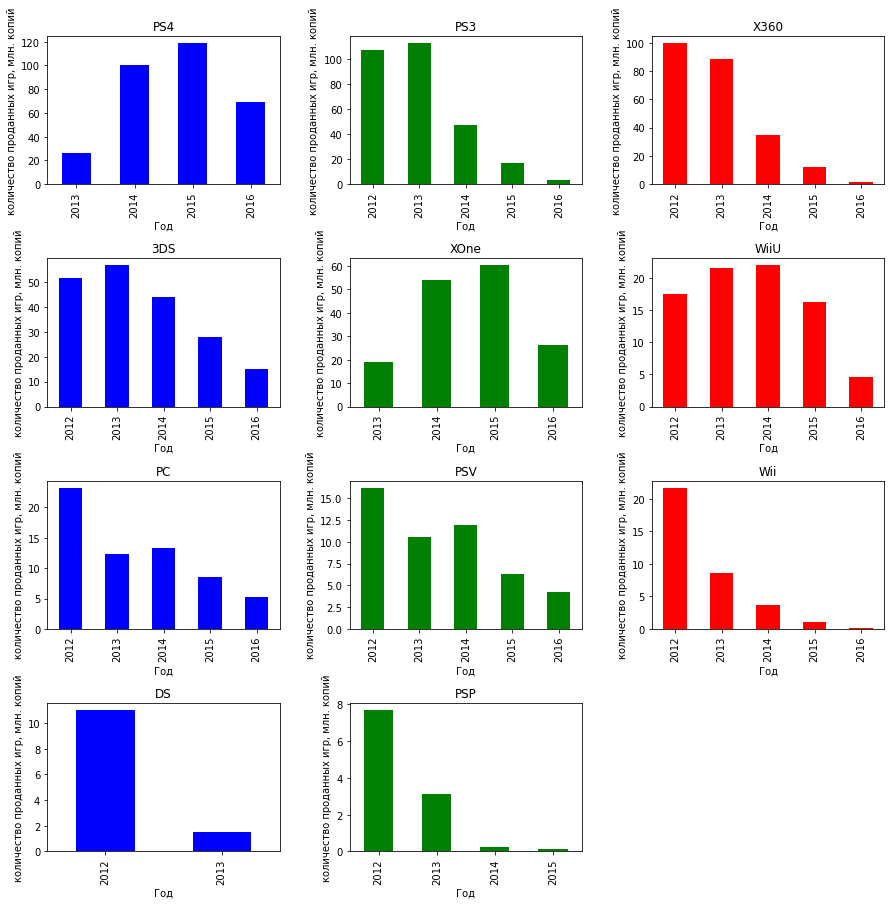

In [45]:
act_platform_list = act_platform_sales.index.tolist()
title_inx = 0
serie = 1
clr = ['b', 'g', 'r'] * 4

for plat in act_platform_list:
    ax = plt.subplot(4, 3, serie)
    act_platform_group = actual_df.query('platform == @plat').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    act_platform_group.columns = ['sales_2011-2016']
    act_platform_group.plot(kind='bar', y='sales_2011-2016', ax=ax, figsize=(15, 15), color=clr[title_inx], legend=False)
    plt.title(act_platform_list[title_inx])
    plt.xlabel('Год')
    plt.ylabel('количество проданных игр, млн. копий')
    title_inx += 1
    serie += 1
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

По графикам можно видеть, что:  
- платформы PS3 и X360, которые лидировали в прошлых периодах, подходя к моменту своего ухода с рынка - их заменяют платформы нового поколения PS4 и XOne (за последние 5 лет выбиваются в лидеры). Именно на них стоит делать акцент в ближайшие несколько лет (они только появились и их пик ещё впереди). 
- также уходят платформы Wii, PSP, 
- исчезли PS2, DS
- из тех, что остаются приличные результаты, могут показать WiiU (возможно пик только пройден), 3DS, также возможно PSV и PC. За исключением WiiU, по остальным можно сделать предположение, что их пик пройден (хотя ещё могут дать определённый результат из-за их специфики). Однако сбрасывать PC не стоит, т.к. эта платформа постоянно обновляется, и процесс этого обновления более сам по себе плавный. Поэтому на всякий случай стоит глянуть, как шли продажи по PC за всё время (для перепроверки) 

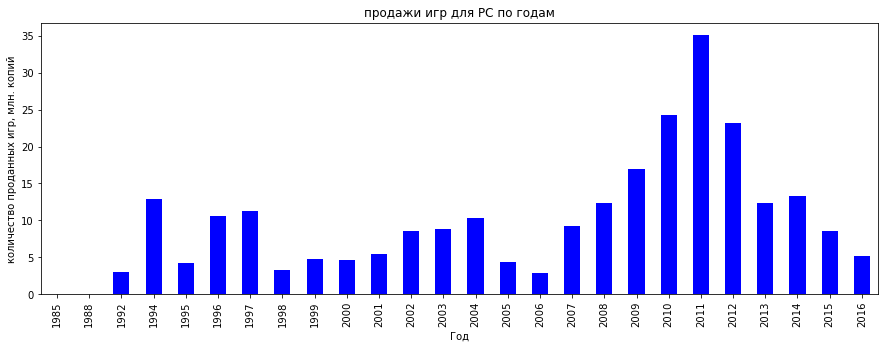

In [46]:
# отдельно посмотрим на PC (своя специфика)
pc_sales = main_df.query('platform == "PC"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
pc_sales.columns = ['sales']
pc_sales.plot(kind='bar', y='sales', figsize=(15, 5), color='b', legend=False, title= 'продажи игр для PC по годам')
plt.xlabel('Год')
plt.ylabel('количество проданных игр, млн. копий')
plt.show()

Т.е. "срок жизни" платформы PC значительно длиннее, чем у остальных платформ, при этом в разные периоды имеет свои пики, поэтому PC полностью исключать нельзя.
Итого: основной акцент стоит сделать на PS4, XOne, WiiU, PC, а также возможно пока ещё 3DS и PSV

Итого: основной акцент стоит сделать на PS4, XOne, WiiU, PC, а также возможно пока ещё 3DS и PSV

### Глобальные продажи игр в разбивке по платформам (диаграммы "ящик с усами")
Для начала посмотрим диаграмммы "ящик с усами" по всем платформам за весь период, который охватывает исходный датасет.

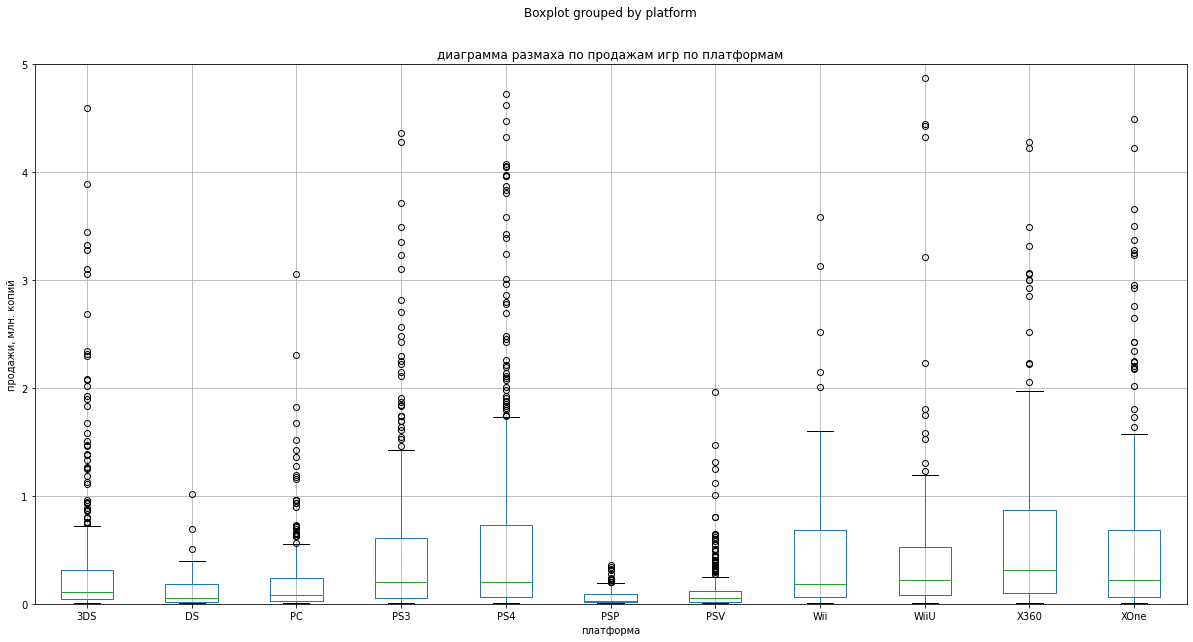

In [47]:
actual_df.boxplot(column='total_sales', by='platform', figsize=(20, 10))
plt.title('диаграмма размаха по продажам игр по платформам')
plt.xlabel('платформа')
plt.ylabel('продажи, млн. копий')

plt.ylim(0, 5)
plt.show()

Для большинства платформ нормальные значения количество проданных копий отдельных игр лежит, как правило, в диапазоне от 0 до 1 (или даже 1,5) млн. копий. 
Стоит отметить, что у ряда актуальных лидеров (PS3, PS4, XOne, X360, Wii, WiiU) разброс основных/нормальных значений сильнее - верхняя граница выше 1 млн. копий (где-то от 1,15 до 2).
При этому для каждой платформы есть приличные выбросы:
- у ряда платформ есть отдельные игры, которые продавались тиражом более 3, 4 и даже 5 млн. копий игр. Сложно сказать, может ли это быть ошибка подсчётов или сбора данных, т.к это вполне могут быть какие-то отдельно взятые очень популярные игры (блокбастеры)
- наиболее многочисленные и "растянутые" выбросы можно видеть у PS4, PS3, 3DS и отчасти у PSV и PC (но у них в принципе меньше основные объёмы продаж)
- у XOne и X360 также имеются выбросы, разбросанные по довольно значительной площади, однако их общее количество гораздо меньше, чем у платформа указанных выше (что, наверно может объяснятся меньшим количеством блокбастеров и эксклюзивов - например, Playstation в большей степени. чем Xbox, предпочитает реализовывать эксклюзивные продукты для своей платформы.
- самые небольшие и незначительные выбросы наблюдаются у DS и PSP (отчасти может объясняться очень тем, что выбранный период - период ухода этих платформ.

Далее посмотрим уже для актуального периода более подробно (с масштабированием) для каждой платформы.

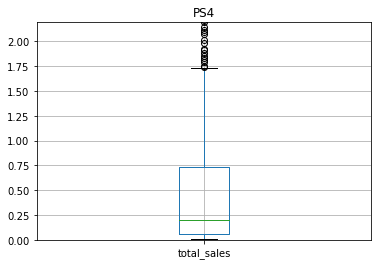

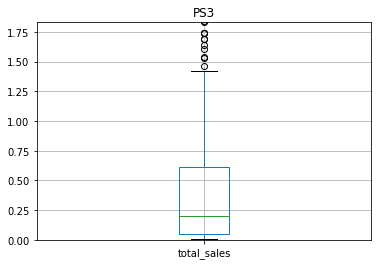

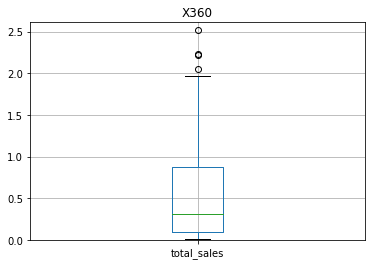

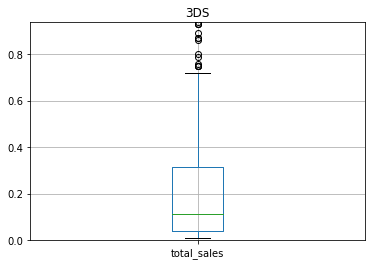

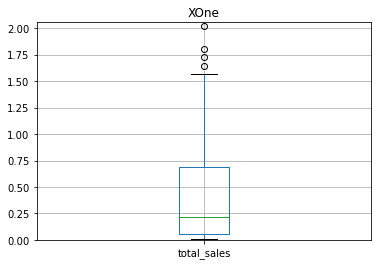

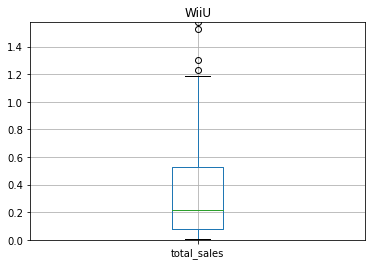

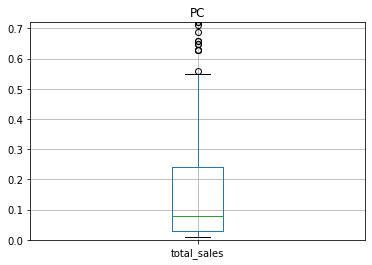

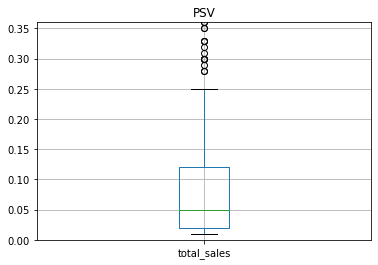

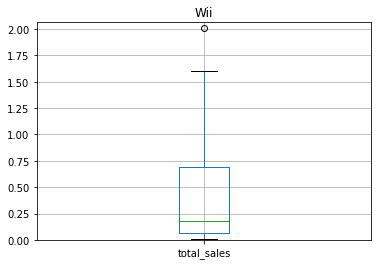

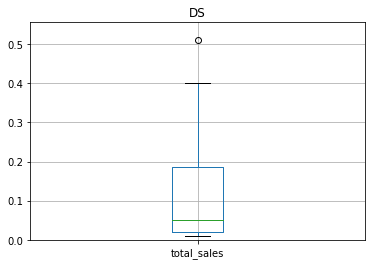

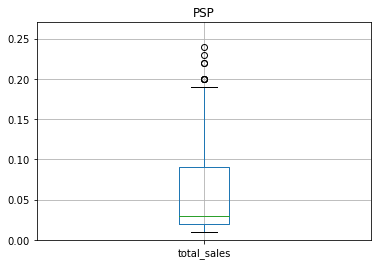

In [48]:
title_inx = 0

for plat in act_platform_list:
    platform_df = actual_df.query('platform == @plat')
    max = np.percentile(platform_df['total_sales'], 75) * 3
    platform_df.boxplot(column='total_sales')
    plt.title(act_platform_list[title_inx])
    plt.ylim(0, max)
    title_inx += 1
    plt.show()

Итого, в актуальном периоде:
- у платформы PS4 нормальные значения продаж простираются в диапазоне от 0 до 1,74 млн.копий (здесь и далее - в расчёте на каждую игру). Медиана - примерно 0,24. Много выбросов.
- PS3 - от 0 до 1,4 млн. копий, медиана - примерно 0,24. Выбросы таке имеются, но меньше
- у X360 - нормальные значения от 0 до 1,9, медиана - 0,25 млн. проданных копий игр. Выбросы есть, но их немного.
- 3DS - от 0,05 до 0,75 млн. копий, медиана - примерно 0,1. Выбросы есть.
- XOne - от 0 до 1,55 млн. копий, медиана - примерно 0,24, Выбросы есть, но их также немного.
- WiiU - от 0 до 1,19млн. копий, медиана - примерно 0,21. Имеются редкие выбросы, но их разброс сильный.
- PC - от 0,01 до 0,55 млн. копий, медиана - примерно 0,09. Выбросы имеются, не такие многочисленные, как у PS4 и PS3, но их не мало и тоже с приличным разбросом.
- PSV - от 0,02 до 0,25млн. копий, медиана -  0,05. Выбросы имеются, но довольно кучные (до 1 млн. копий)
- Wii - от 0,01 до 1,55млн. копий, медиана - примерно 0,2.  Имеются редкие выбросы.
- DS - от 0,02 до 0,04млн. копий, медиана - примерно 0,05. Выбросов почти нет (всего 3шт).
- PSP - от 0,02 до 0,19млн. копий, медиана - примерно 0,03, выбросы имеются, но вольно кучные (все не превышают 0,5)
Полагаю, что по актуальному периоду можно сделать небольшое предположение, что наличие и количество в первую очередь зависит от актуальности платформы, от её специфичности и уникальности (например, 3DS, PSV и PSP - это исключительно портативные платформы, а Wii и WiiU имеют уникальные возможности, что отличает эти платформы от более традиционных PS3, PS4, XOne, X360 и PC), а также наличия в линейке игр для платформы возможных эксклюзивов. Т.е. чем новее, специфичнее платформа, и чем больше для неё есть эксклюзивов, тем по количеству проданных игр больше будет выбросов и больше будет их разброс.      

### Влияние отзывов критиков/пользователей и количеством продаж

#### по отзывам критиков.

Начнём с самой популярной платформы за всё время - PS2

1275


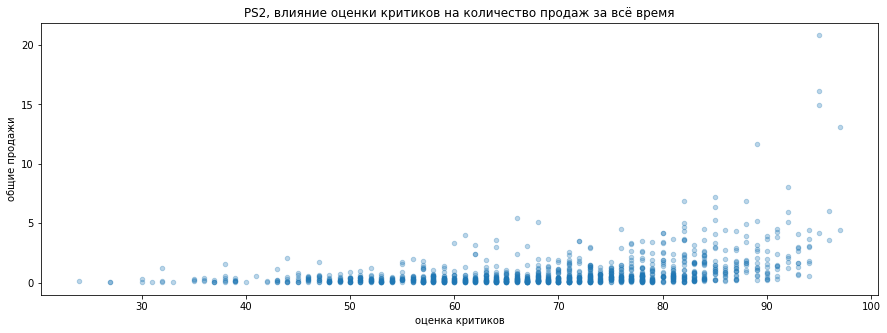

In [49]:
# сделаем диаграмму рассеевания для самой поплярной за весь период
# Помним, что по столбцу отзывы критиков нужно отфильтровать больше 0, чттобы убрать былые пропущенные строки.
ps2_rating = main_df.query('platform == "PS2" and critic_score >= 0') 
print(len(ps2_rating))
ps2_rating.plot(kind='scatter', x='critic_score', y='total_sales', alpha=0.3, figsize=(15, 5), title='PS2, влияние оценки критиков на количество продаж за всё время')
plt.xlabel('оценка критиков')
plt.ylabel('общие продажи')
plt.show()

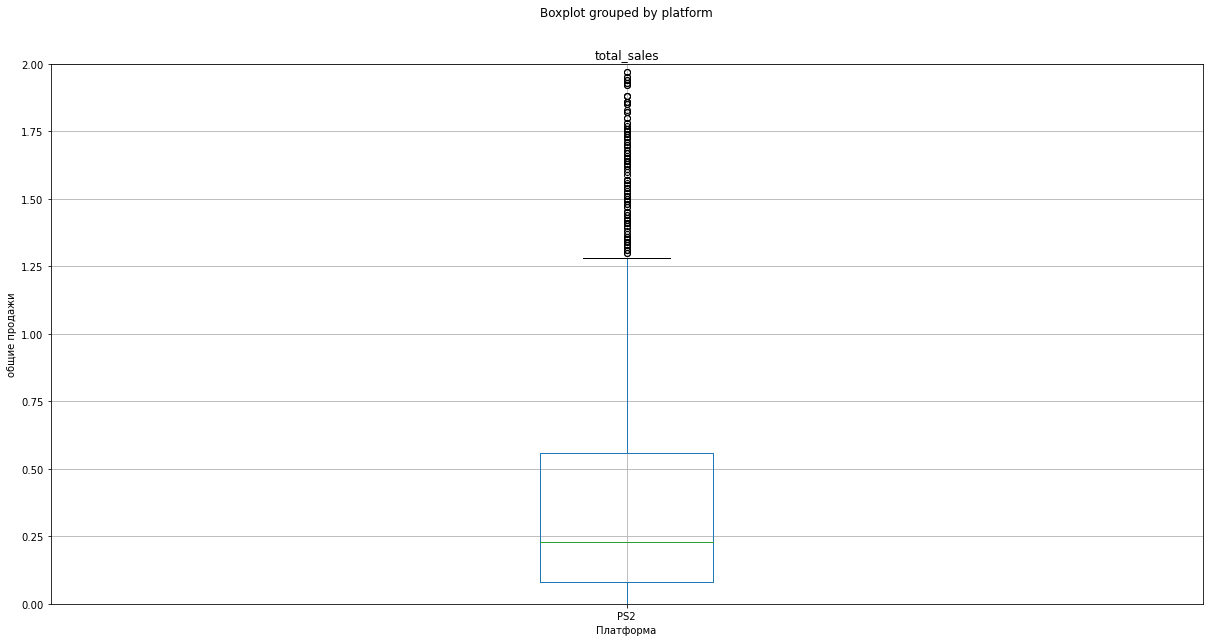

In [50]:
# Посмотрим на нормальные значения для PS2
main_df.query('platform == "PS2"') .boxplot(column='total_sales', by='platform', figsize=(20, 10))
plt.ylim(0, 2)
plt.xlabel('Платформа')
plt.ylabel('общие продажи')
plt.show()

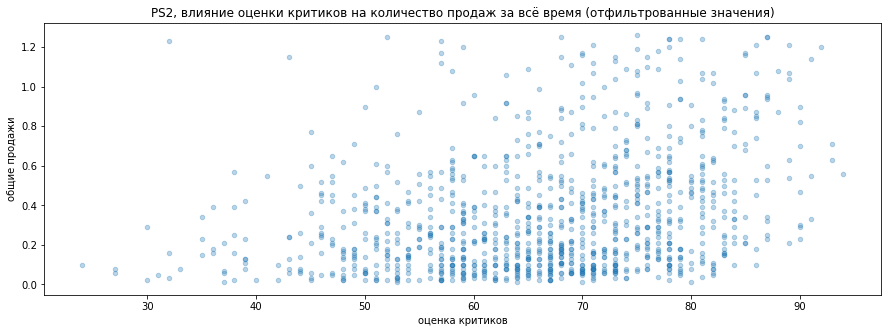

In [51]:
# нормальные значения по продажам для PS2
good_sales_ps2 = main_df.query('platform == "PS2" and 0 <= total_sales <= 1.26 and critic_score >= 0') 
good_sales_ps2.plot(kind='scatter', x='critic_score', y='total_sales', alpha=0.3, figsize=(15, 5), title='PS2, влияние оценки критиков на количество продаж за всё время (отфильтрованные значения)')
plt.xlabel('оценка критиков')
plt.ylabel('общие продажи')
plt.show()

По графику незаметно особо сильного влияния на рост продаж при увеличении оценки от критиков, однако всё же рост есть, но незначительный. При этом разброс не очень серьёзный. Посчитаем коэффициент корреляции. Если отсортировать по более "нормальным" значениям в плане продаж копий игр (от 0 до 1,35), то очевидной связи снова не наблюдается, однако разброс в оценках стал ещё сильнее.

In [52]:
print(ps2_rating['total_sales'].corr(ps2_rating['critic_score']))
print(good_sales_ps2['total_sales'].corr(good_sales_ps2['critic_score']))


0.3925364754450903
0.3088725111998991


Коэффициент корреляции лишь подтверждает, что связь, если она и есть, то слабая (во всяком случае по платформе PS2).

Аналогично посмотрим на влияние оценки критиков в актуальном периоде для наиболее популярной платформы - PS4

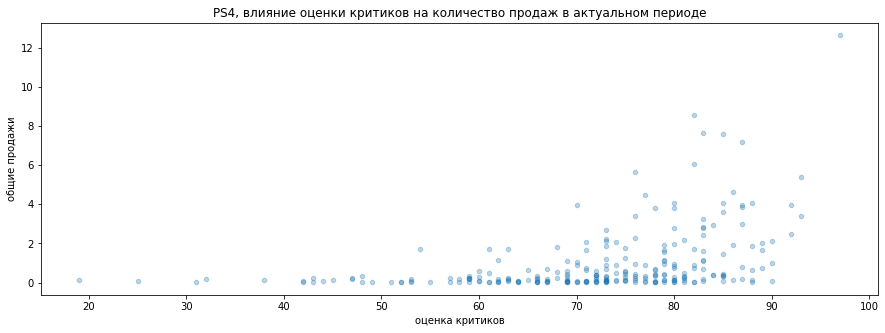

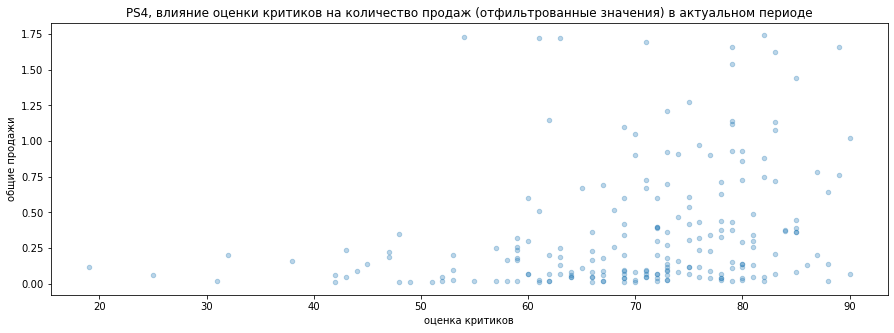

In [53]:
ps4_rating = actual_df.query('platform == "PS4" and critic_score >= 0') 
ps4_rating.plot(kind='scatter', x='critic_score', y='total_sales', alpha=0.3, figsize=(15, 5), title='PS4, влияние оценки критиков на количество продаж в актуальном периоде')
plt.xlabel('оценка критиков')
plt.ylabel('общие продажи')
plt.show()

# нормальные значения по продажам для PS3
good_sales_ps4 = actual_df.query('platform == "PS4" and 0 <= total_sales <= 1.74 and critic_score >= 0') 
good_sales_ps4.plot(kind='scatter', x='critic_score', y='total_sales', alpha=0.3, figsize=(15, 5), title='PS4, влияние оценки критиков на количество продаж (отфильтрованные значения) в актуальном периоде')
plt.xlabel('оценка критиков')
plt.ylabel('общие продажи')
plt.show()

И снова в первом случае (без сортировки по "нормальным" продажам) заметной связи нет, но нет и сильного разброса.  
В случае сортировки по нормальным значениям снова лишь сильно увеличивается разброс.

In [54]:
print(ps4_rating['total_sales'].corr(ps4_rating['critic_score']))
print(good_sales_ps4['total_sales'].corr(good_sales_ps4['critic_score']))

0.40656790206178123
0.2726238945252287


И снова коэффициент корреляции даёт показывает отсутствие сильной взаимосвязи между оценкой критиков и продажами (связь слабая в первом случае и очень слабая во втором).

Далее посмотрим, как это происходит для остальных платформ в актуальном периоде

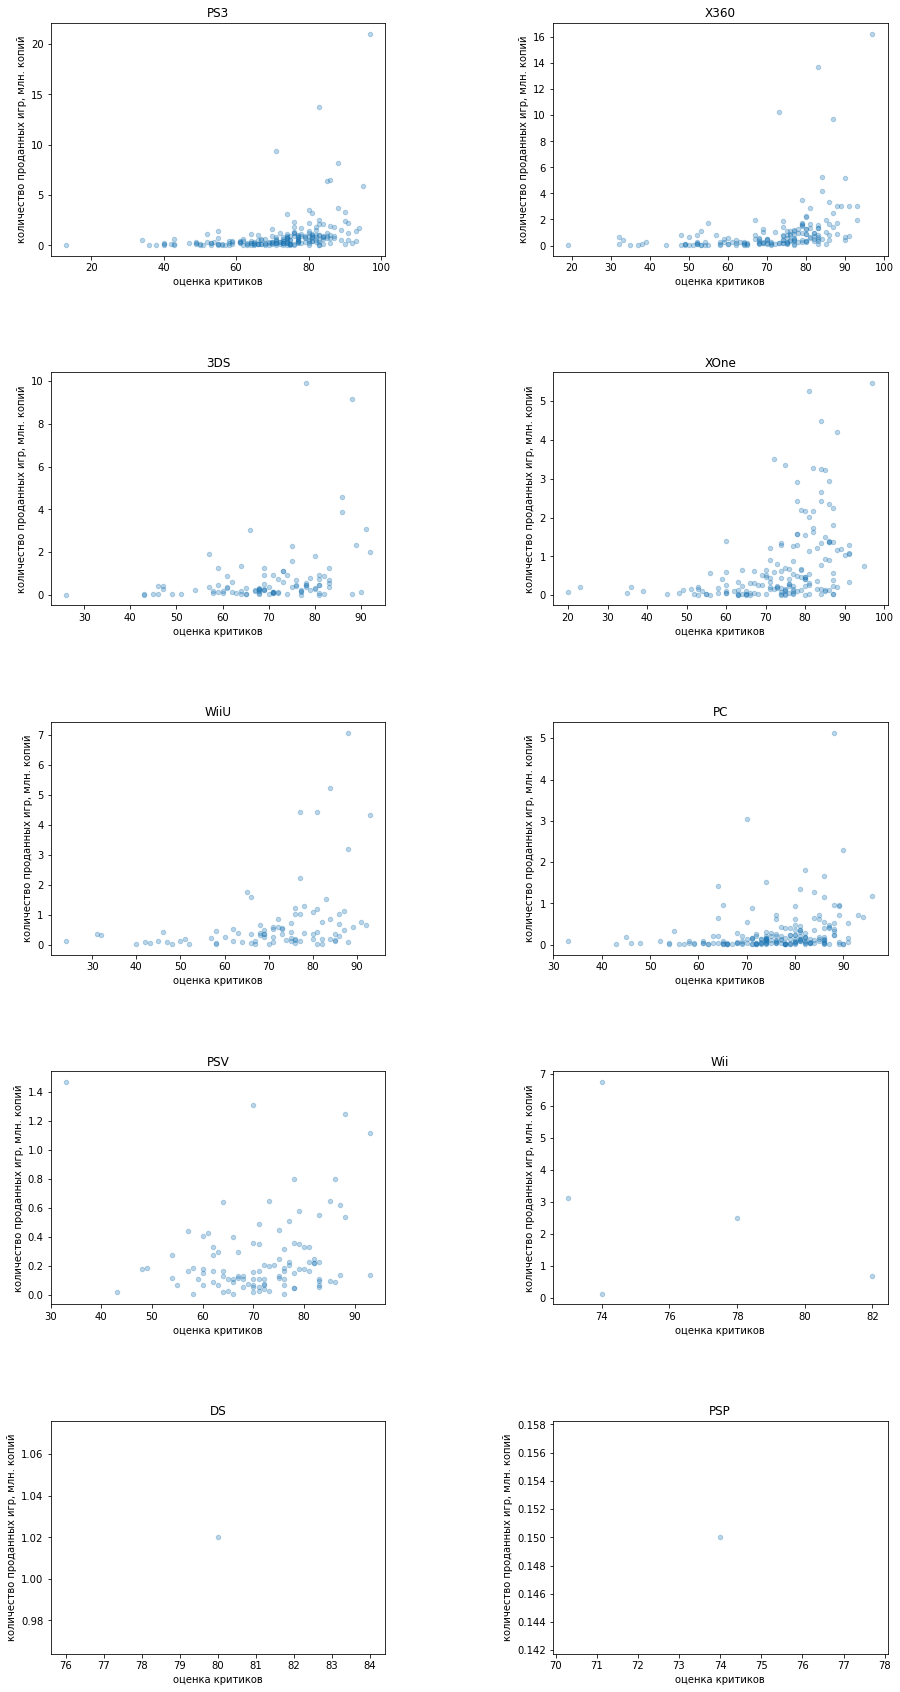

In [55]:
title_inx = 0
serie = 1

for plat in act_platform_list:
    if plat != 'PS4':
        critic_sales = actual_df.query('platform == @plat and critic_score >= 0')
        ax = plt.subplot(5, 2, serie)
        critic_sales.plot(kind='scatter', x='critic_score', y='total_sales', ax=ax, alpha=0.3, figsize=(15, 30))
        plt.title(act_platform_list[title_inx])
        plt.xlabel('оценка критиков')
        plt.ylabel('количество проданных игр, млн. копий')
        serie += 1
    title_inx += 1
    
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

Практически для всех платформ актуального периода, где имеются отзывы, повторяется ситуация, как и выше для PS4 и PS2 - взаимосвязь между оценкой критиков и количеством продаж очень слабая или отсутствует вовсе. Кроме того, у платформ PSP, Wii и DS вообще недостаточно данных чтобы делать выводы (видимо, очень мало отзывов в актуальном периоде было у игр данных платформ).

In [56]:
# коэф. корреляции для всех платформ из актуального периода, дополнительно исключаем платформы с недостаточными данными данными PSV, Wii и DS.
for plat in act_platform_list:
    if plat != 'PS4' and  plat != 'PSP' and plat != 'Wii' and plat != 'DS':
        plat_cricic_sales = actual_df.query('platform == @plat and critic_score >= 0')
        print('коффициент корреляции между оценкой критиков и продажами игр по платформе {} - '.format(plat), plat_cricic_sales['total_sales'].corr(plat_cricic_sales['critic_score']))


коффициент корреляции между оценкой критиков и продажами игр по платформе PS3 -  0.33149725926295903
коффициент корреляции между оценкой критиков и продажами игр по платформе X360 -  0.36057348885073387
коффициент корреляции между оценкой критиков и продажами игр по платформе 3DS -  0.32080286953607856
коффициент корреляции между оценкой критиков и продажами игр по платформе XOne -  0.41699832800840153
коффициент корреляции между оценкой критиков и продажами игр по платформе WiiU -  0.348379760120175
коффициент корреляции между оценкой критиков и продажами игр по платформе PC -  0.23724324311567907
коффициент корреляции между оценкой критиков и продажами игр по платформе PSV -  0.0944878992931617


Коэффициент корреляции от 0,09 до 0,39 - связь или слабая, или почти отсутствует (У 5 платформ - слабая, у 2-х - очень слабая)


#### по отзывам пользователей.

Аналогично посмотрим ситуацию для оценок пользователей

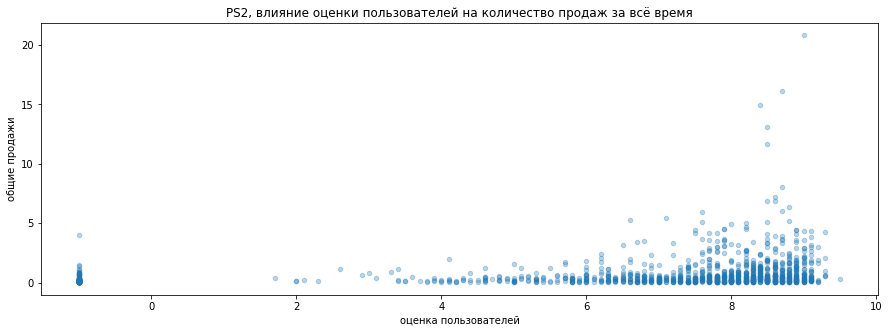

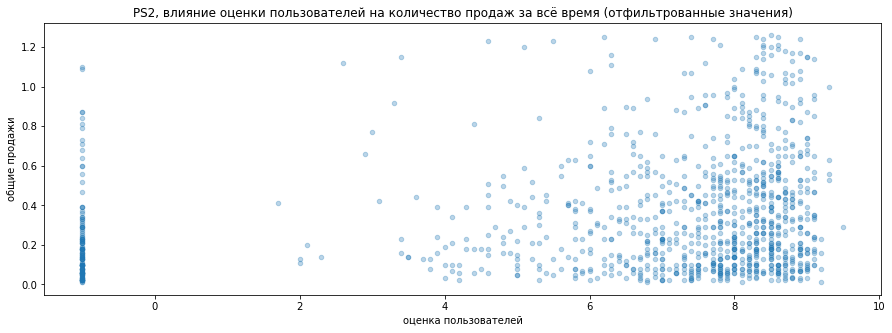

In [57]:
ps2_rating.plot(kind='scatter', x='user_score', y='total_sales', alpha=0.3, figsize=(15, 5), title='PS2, влияние оценки пользователей на количество продаж за всё время')
plt.xlabel('оценка пользователей')
plt.ylabel('общие продажи')
plt.show()

# нормальные значения по продажам для PS2
good_sales_ps2.plot(kind='scatter', x='user_score', y='total_sales', alpha=0.3, figsize=(15, 5), title='PS2, влияние оценки пользователей на количество продаж за всё время (отфильтрованные значения)')
plt.xlabel('оценка пользователей')
plt.ylabel('общие продажи')
plt.show()

И снова ощутимой зависимости не наблюдается.

In [58]:
print(ps2_rating['total_sales'].corr(ps2_rating['user_score']))
print(good_sales_ps2['total_sales'].corr(good_sales_ps2['user_score']))

0.1857998586669713
0.19824282824085637


Коэффициент корреляции 0,18-0,2 - зависимость продаж от оценки пользователей в случае с PS2 за весь период ещё ниже, чем от оценки критиков (очень слабая).

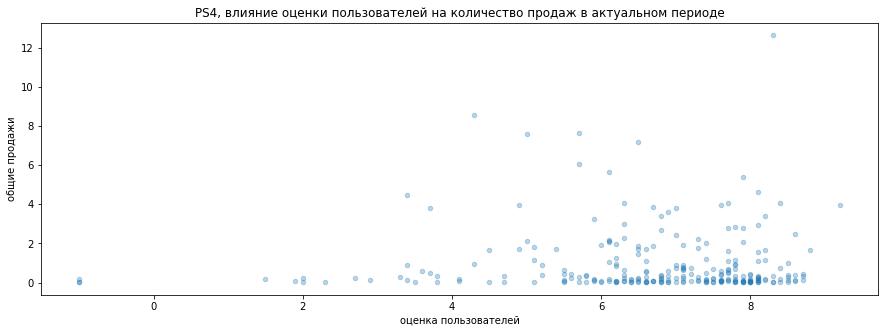

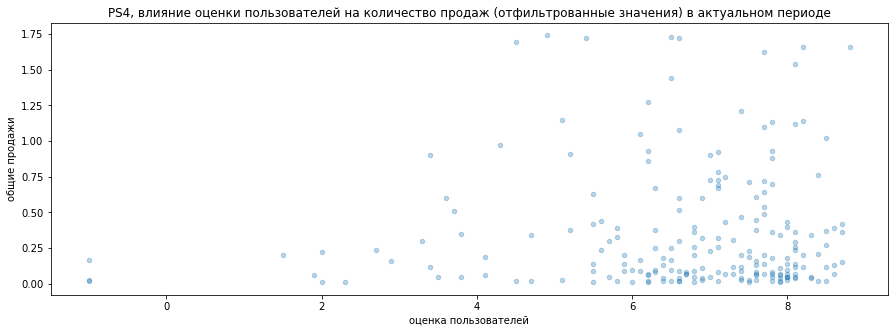

In [59]:
ps4_rating.plot(kind='scatter', x='user_score', y='total_sales', alpha=0.3, figsize=(15, 5), title='PS4, влияние оценки пользователей на количество продаж в актуальном периоде')
plt.xlabel('оценка пользователей')
plt.ylabel('общие продажи')
plt.show()

# нормальные значения по продажам для PS4
good_sales_ps4.plot(kind='scatter', x='user_score', y='total_sales', alpha=0.3, figsize=(15, 5), title='PS4, влияние оценки пользователей на количество продаж (отфильтрованные значения) в актуальном периоде')
plt.xlabel('оценка пользователей')
plt.ylabel('общие продажи')
plt.show()

Аналогичная ситуация наблюдается и для PS4 (как самой популярной платформе) в актуальном периоде.

In [60]:
print(ps4_rating['total_sales'].corr(ps4_rating['user_score']))
print(good_sales_ps4['total_sales'].corr(good_sales_ps4['user_score']))

0.0012601639682130656
0.050974420847474895


Коэффициент корреляции ещё ниже (от 0,001 до 0,05) - очень слабая связь (практически отсутствует)

Также посмотрим на остальные платформы в актуальном периоде.

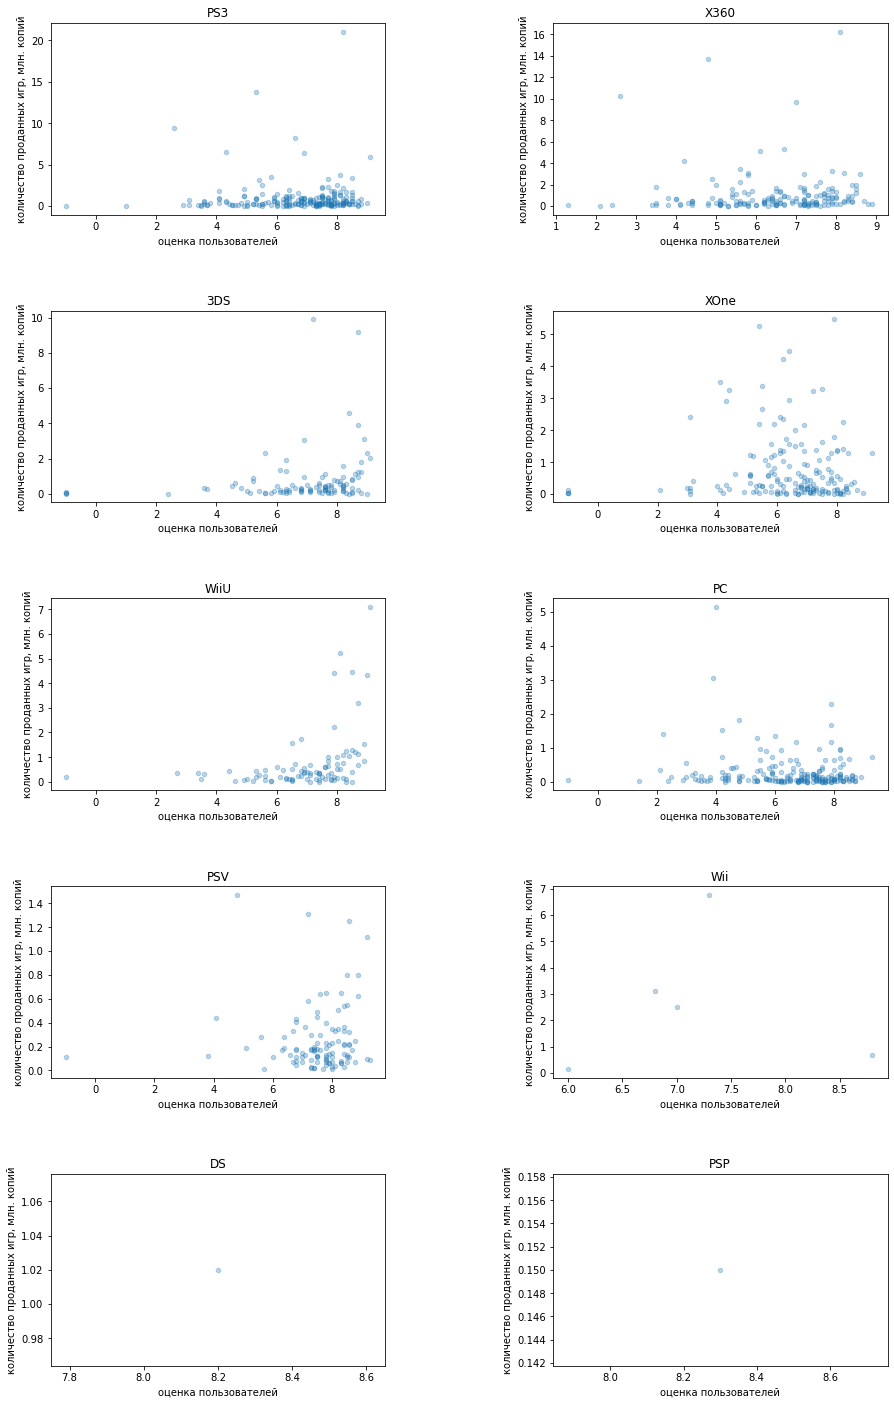

In [61]:
title_inx = 0
serie = 1

for plat in act_platform_list:
    if plat != 'PS4':
        user_sales = actual_df.query('platform == @plat and critic_score >= 0')
        ax = plt.subplot(6, 2, serie)
        user_sales.plot(kind='scatter', x='user_score', y='total_sales', ax=ax, alpha=0.3, figsize=(15, 30))
        plt.title(act_platform_list[title_inx])
        plt.xlabel('оценка пользователей')
        plt.ylabel('количество проданных игр, млн. копий')
        serie += 1
    title_inx += 1
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

Снова очень большой разброс у многих платформ и нет очевидной взаимосвязи.  
Также у Wii, DS и PSP недостаточность данных вероятно из-за нехватки отзывов.

In [62]:
for plat in act_platform_list:
    if plat != 'PS4' and  plat != 'PSP' and plat != 'Wii' and plat != 'DS':
        plat_user_sales = actual_df.query('platform == @plat and critic_score >= 0')
        print('коффициент корреляции между оценкой пользователей и продажами игр по платформе {} - '.format(plat), plat_user_sales['total_sales'].corr(plat_user_sales['user_score']))


коффициент корреляции между оценкой пользователей и продажами игр по платформе PS3 -  0.013749827372812676
коффициент корреляции между оценкой пользователей и продажами игр по платформе X360 -  -0.0020140394826897927
коффициент корреляции между оценкой пользователей и продажами игр по платформе 3DS -  0.20269097617719686
коффициент корреляции между оценкой пользователей и продажами игр по платформе XOne -  0.0010791571372793924
коффициент корреляции между оценкой пользователей и продажами игр по платформе WiiU -  0.35769079109336177
коффициент корреляции между оценкой пользователей и продажами игр по платформе PC -  -0.12051044839304245
коффициент корреляции между оценкой пользователей и продажами игр по платформе PSV -  0.04401490925030734


Разброс коэффициента корреляции по разным платформам довольно значительный - от -0,12 до 0,20. Однако это всё равно очень низкие значения для того, чтобы можно было говорить о наличии серьёзной связи между оценкой пользователей и количеством продаж (диаграммы рассеивания это также показывают). Т.е. связь очень слабая

### Распределение игр по жанрам
И снова посмотрим в двух плоскостях: за весь период и в актуальном периоде.

#### За всё время

In [63]:
# собираем сводную таблицу сгруппировав по жанрам (за всё время)
genre_games = main_df.pivot_table(index='genre', values='total_sales', aggfunc=['count', 'sum', 'mean'])
genre_games.columns = ['numbre_games', 'total_sales', 'sales_per_game']
genre_games['sales_per_game'] = round(genre_games['sales_per_game'], 3)
# sales_per_game - среднее количество копий, проданных по каждой игре в рамках жанра
genre_games.sort_values(by='numbre_games', ascending=False, inplace=True)
genre_games

,numbre_games,total_sales,sales_per_game
genre,,,
Action,3306,1716.50,0.519
Sports,2306,1309.67,0.568
Misc,1721,790.29,0.459
Role-Playing,1481,931.08,0.629
Shooter,1296,1041.36,0.804
Adventure,1293,233.33,0.180
Racing,1226,723.49,0.590
Platform,878,825.55,0.940
Simulation,857,387.96,0.453


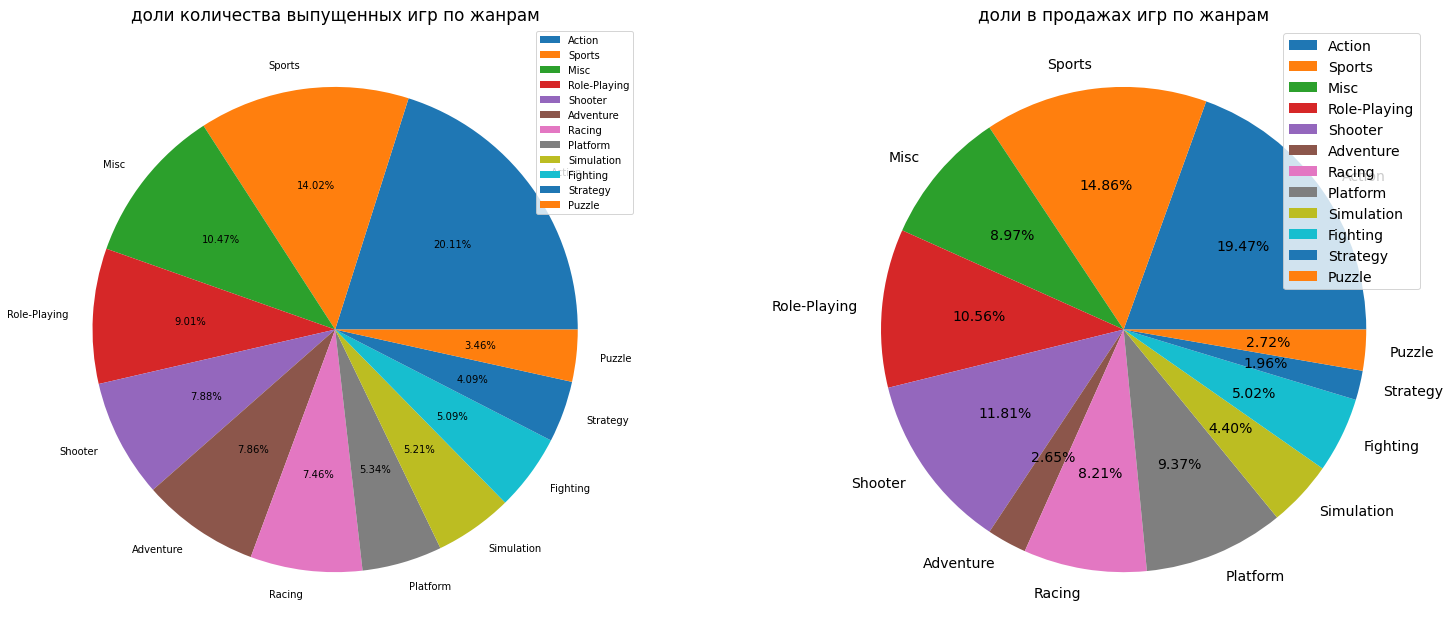

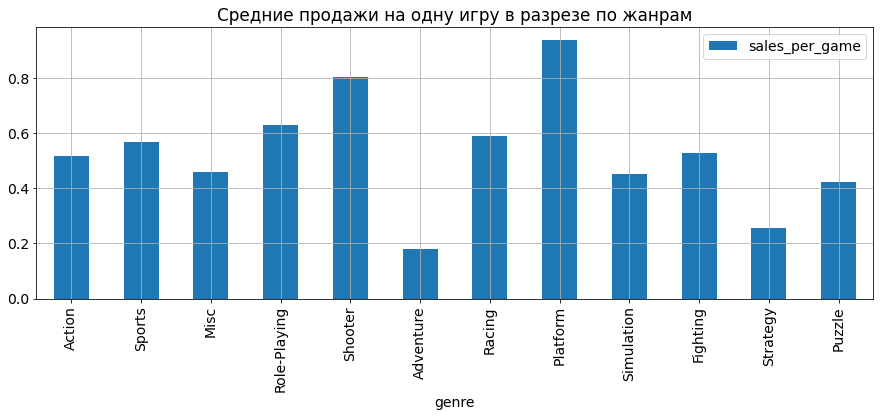

In [64]:
# для столбцов "количество выпущенных игр" и "продажи" сделаем круговые диаграммы
ax1=plt.subplot(1, 2, 1)
genre_games.plot(kind='pie', y='numbre_games', figsize=(25, 25), autopct='%1.2f%%', ax=ax1)
plt.rcParams.update({'font.size': 14})
plt.ylabel('')
plt.title('доли количества выпущенных игр по жанрам')


ax2=plt.subplot(1, 2, 2)
genre_games.plot(kind='pie', y='total_sales', figsize=(25, 25), autopct='%1.2f%%', ax=ax2)
plt.rcParams.update({'font.size': 14})
plt.ylabel('')
plt.title('доли в продажах игр по жанрам')

plt.subplots_adjust(wspace=0.3)
plt.show()

# для столбца "средние продажи на каждую игру в рамках жанра" сделаем столбчатую диаграмму
genre_games.plot(kind='bar', y='sales_per_game', figsize=(15, 5), grid=True, title='Средние продажи на одну игру в разрезе по жанрам')
plt.show()

Итак, за всё время, которое учитывает сходный датасет:  
- больше всего выпускается игр в жанре Action - 20,11%
- также значительные доли занимают жанры Sports, Misc, Role-Playing (14,02%, 10,47 и 9,01% соответственно)
- Shooter, Adventure, Racing - от 7,46% до 7,88%
- остальные менее 5,345%
- меньше всего Puzzle (3,46%) и Strategy(4,09%)
- при этом в плане именно продаж лидирует также Action (19,47%) и Sports (14,86%), но на 3-м месте уже Shooter (11,81%), а Role-Playing (10,56%) на 4-м. На них и стоит обращать внимание в первую очередь. Возможно стоит также учесть Platform (9.37%) и Misc (8.97%)
- остальные платформы набирают менее 8.5%
- наименьшие продажи показывают снова Puzzle (2,72%), Strategy (1,96%), к которым добавляется ещё Adventure (2,65%)
- также можно видеть, что средние продажи на одну игру больше всего у Platform(940тыс. копий), Shooter (804 тыс. копий), Role-и Playing (629тыс.копий). Меньше всего у Adventure (180тыс) и Strutegy(256тыс). Но нужно помнить, что этот показатель у отдельных жанров может быть смещён вверх из-за отдельно взятых слишком популярных игр.

#### В актуальном периоде

In [65]:
# собираем сводную таблицу сгруппировав по жанрам (за актуальный период)
actual_genre = actual_df.pivot_table(index='genre', values='total_sales', aggfunc=['count', 'sum', 'mean'])
actual_genre.columns = ['numbre_games', 'total_sales', 'sales_per_game']
actual_genre['sales_per_game'] = round(actual_genre['sales_per_game'], 3)
# sales_per_game - среднее количество копий, проданных по каждой игре в рамках жанра
actual_genre.sort_values(by='numbre_games', ascending=False, inplace=True)
actual_genre

,numbre_games,total_sales,sales_per_game
genre,,,
Action,1031,441.12,0.428
Role-Playing,370,192.80,0.521
Adventure,302,29.43,0.097
Sports,268,181.07,0.676
Shooter,235,304.73,1.297
Misc,192,85.04,0.443
Racing,115,53.50,0.465
Fighting,109,44.49,0.408
Platform,85,61.00,0.718


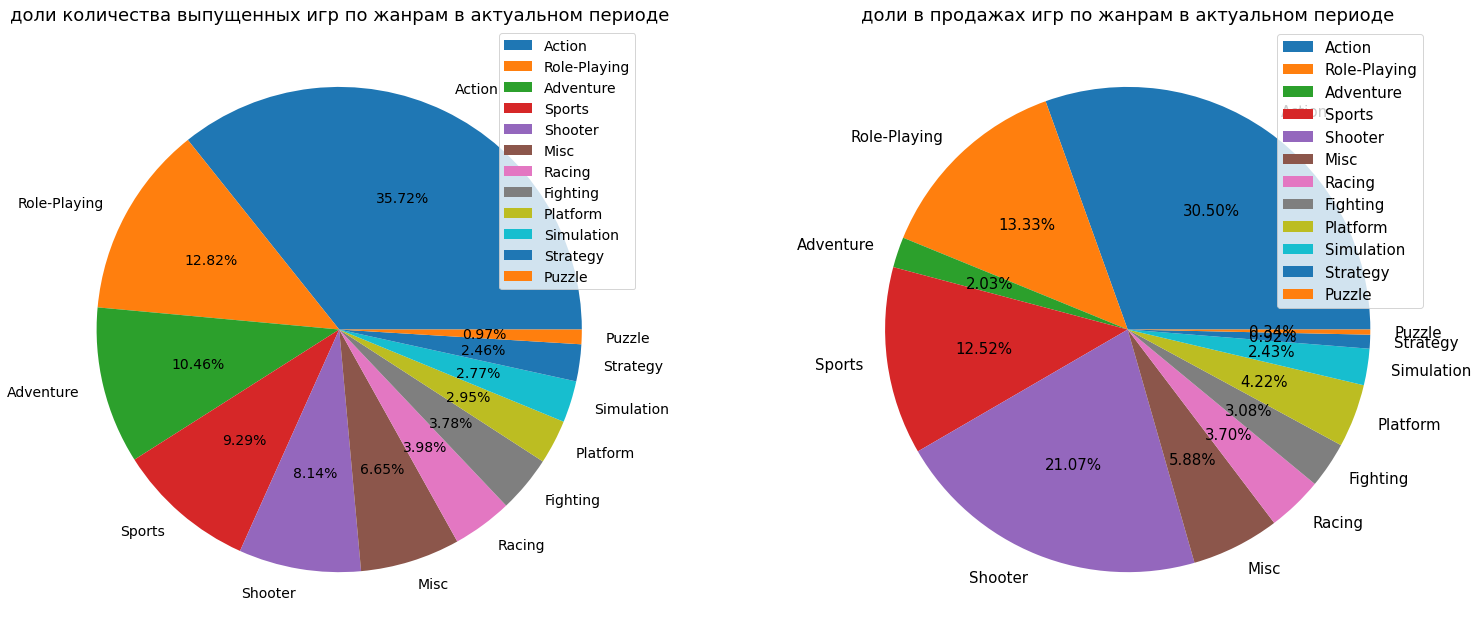

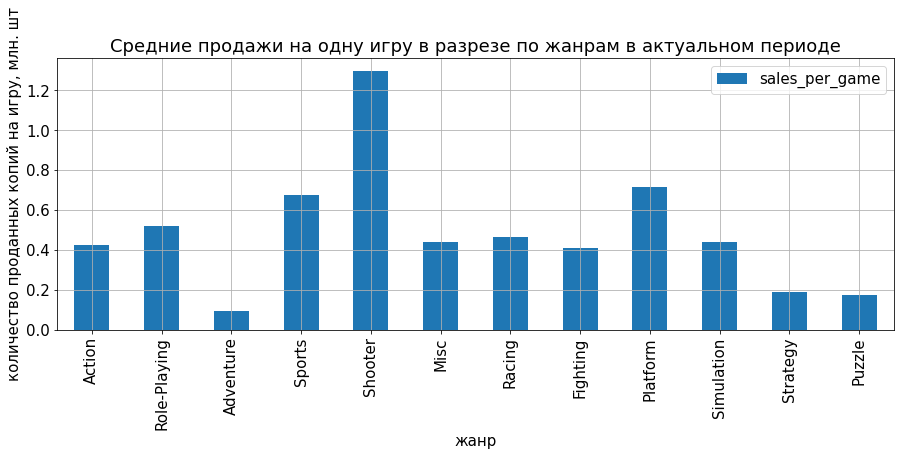

In [66]:
# для столбцов "количество выпущенных игр" и "продажи" сделаем круговые диаграммы
ax1=plt.subplot(1, 2, 1)
actual_genre.plot(kind='pie', y='numbre_games', figsize=(25, 25), autopct='%1.2f%%', ax=ax1)
plt.rcParams.update({'font.size': 15})
plt.ylabel('')
plt.title('доли количества выпущенных игр по жанрам в актуальном периоде')


ax2=plt.subplot(1, 2, 2)
actual_genre.plot(kind='pie', y='total_sales', figsize=(25, 25), autopct='%1.2f%%', ax=ax2)
plt.rcParams.update({'font.size': 15})
plt.ylabel('')
plt.title('доли в продажах игр по жанрам в актуальном периоде')

plt.subplots_adjust(wspace=0.3)
plt.show()

# для столбца "средние продажи на каждую игру в рамках жанра" сделаем столбчатую диаграмму
actual_genre.plot(kind='bar', y='sales_per_game', figsize=(15, 5), grid=True, title='Средние продажи на одну игру в разрезе по жанрам в актуальном периоде')
plt.xlabel('жанр')
plt.ylabel('количество проданных копий на игру, млн. шт')
plt.show()

В актуальном периоде доли несколько распределились:  
- больше всего выпускается игр также в жанре Action - уже 35,72%
- значительные доли занимают жанры Role-Playing, Sports, Adventure и Shooter (12,82%, 10,46%, 9,29% и 8,14% соотвественно)
- Misc - 6,65%
- остальные менее 5%
- меньше всего снова Puzzle (0,97%) и Strategy(2,46%)
- в плане именно продаж лидирует также Action (уже 30,50%, т.е. почти треть всех продаж), Shooter уже на 2-м месте (21,07%), а Role-Playing на 3-м (13,33%). Также большую долю занимает и Sports (12,52%). Т.е. основной упор стоит делать на эти 4 жанра
- остальные платформы набирают менее 6%
- наименьшие продажи показывают снова Puzzle (0,34%), Strategy (0,92%) и Adventure (2,03%)
- также можно видеть, что теперь средние продажи на одну игру больше всего у Shooter (1,297млн. копий), Platform (0,718тыс.) Sports (676тыс.копий). Меньше всего у Adventure (97тыс) и Puzzle(175тыс). Снова учитываем излишнюю популярность взятых игр отдельных жанров.

**Итого:**
Что ключевыми жанрами, которые будут формировать выручку это  Action (в первую очередь) и Shooter. Также к ним можно добавить Role-Playing и Sports. Суммарные продажи игр этих жанров занимают 77,42% всех проданных игр. Но обязательно нужно учитывать, что ассортимент внутри каждого из этих жанров достаточно обширен (особенно в случае игр жанра Action) и не все игры продаются одинаково хорошо.  
Также можно сделать интересное наблюдение - за 5 лет игр жанра Shooter выпущено всего чуть больше 8%, но их продажи составили больше 21% от общего количества проданных за этот период копий. И обратная ситуация: идоля выпущенных игр в жанре Adventure составила (10,46%), но их продажи заняли всего 2,03% от общего числа. Т.е. в этом смысле игры жанра Shooter показывают большую эффективность, чем многие другие.

### Итого по разделу 3:
-  количество выпускаемых игр практически постоянно росло на протяжении 1980 до 2008-2009 года (с 2000 резкий сильной рост). После 2008 года не менее резкое снижение вплоть до 2015года (количество выпускаемых игр на уровне 2001-2002 года). Основной объём выпущенных игр приходится на 2003-2010год, При этом нормальные/показательные годы охватывают период с 2000-2016.
- за всё время с 1980 по 2016 год наиболее популярными с точки зрения продажи лицензионных копий игр стали PS2, X360, PS3, Wii, DS, PS. При этом в большинстве случаев платформа "живет" в среднем 10-12 лет. За этот период  2-3 года платформа набирает популярность, ещё через 2-3 года достигает пика, а после оставшиеся 4-5 лет продажи начинают падать. 
- с учётом вышеизложенного наиболее актуальными для анализа являются последние 4-5 лет (можно увидеть, какие платформы только набирают популярность, а какие уже заканчивают свою жизнь). При этом стоит учитывать, что у PC "срок жизни" не совсем стандартный - гораздо дольше и имеет несколько периодов роста и снижения продаж (особенность специфики платформы). Наиболее популярными платформами, актуального периода и предположительно последующего  периода являются  PS4, PS3, X360, 3DS (пока ещё "живет"), XOne и WiiU.
- для большинства платформ нормальные значения по продажам отдельно взятой игры укладываются в диапазон от 0 до 1 (или  даже1,5млн. копий). У наиболее популярных платформ актуального периода ситуация следующая:
    + PS4 - от 0 до 1,74млн. копий, медиана - примерно 0,24
    + PS3 - от 0 до 1,4млн. копий, медиана - примерно 0,24
    + X360 - от 0 до 1,9млн. копий, медиана - примерно 0,25
    + XOne - от 0 до 1,55 млн. копий, медиана - примерно 0,24
    + WiiU - от 0 до 1,19млн. копий, медиана - примерно 0,21
    + 3DS - от 0,05 до 0,75 млн. копий, медиана - примерно 0,10
- по анализу сильной взаимосвязи между оценками пользователей или критиков и количеством продаж не обнаружено.
- больше всего игр выпускается в жанре Action (и в актуальном периоде, и за всё время) 
- с точки зрения продаж наиболее популярными являются жанры Action , Sports, Shooter, Role-Playing, а также можно добавить Platform и Misc за всё время (вместе составляют 75,10%)
- эти же первые 4 жанра являются самыми популярными и в актуальном периоде - Action, Shooter, Role-Playing, Sports (однако их веса уже значительно больше, распределяются несколько по-разному. Суммарно 78,05%
- самые непопулярные жанры - Puzzle, Strategy и Adventure.
- При этом можно говорить, что наиболее "эффективным" жанром является Shooter - выпущенные за 5 лет игры занимают чуть более 8%, но по продажам игры этого жанра составляют более 21% от продаж игр всех жанров. При этом можно говорить, что наиболее "эффективным" жанром является Shooter - выпущенные за 5 лет игры занимают чуть более 8%, но по продажам игры этого жанра составляют более 21% от продаж игр всех жанров

## Портрет пользователя по регионам

In [67]:
# Поскольку в каждом регионе алгоритм будет одинаковы запишем всё в функцию, чтобы применить для каждого региона

region = ['na_sales', 'eu_sales', 'jp_sales']
dict_rigion = {'na_sales': 'Северная Америка', 'eu_sales': 'Европа', 'jp_sales': 'Япония'}

def region_user(location):
# продажи по региону группируем по платформам  (суммой)
    print()
    print('Популярные платформы:')
    platform = actual_df.pivot_table(index='platform', values=location, aggfunc=['sum'])
    platform.columns = [location]
    platform.sort_values(by=location, ascending=False, inplace=True)
    display(platform)
    print('Топ-5 популярных платформ:', dict_rigion[location], ':', ', '.join(platform.index[0:5].tolist()))
    print()
    
# круговая диаграмма для оценки долей продаж игр по платформам в регионе
    platform.plot(kind='pie', y=location, figsize=(10, 10), autopct='%1.2f%%')
    plt.rcParams.update({'font.size': 10})
    plt.ylabel('')
    plt.title('доли проданных игр по каждой платформе - {}'.format(dict_rigion[location]))
    plt.show()
    
    print()
# Итог - Топ-5 платформ, их доли и их суммарная доля    
    platform['share'] = platform[location] / platform[location].sum()
    for i in range(0, 5):
        print('доля продаж игр по платформе {}:'.format(platform.index[i]), '{0:.2f}%'.format(platform['share'][i]*100))

    top5_share = round(platform['share'][0:5].sum()*100, 4)
    print('доля продаж, которая приходится на TOP-5 платформ:', dict_rigion[location], '{0:.2f}%'.format(top5_share))     
    
    print()
# продажи по региону группируем по жанрам  (суммой)
    print('Популярные жанры в регионе')    
    genre = actual_df.pivot_table(index='genre', values=location, aggfunc=['sum'])
    genre.columns = [location]
    genre.sort_values(by=location, ascending=False, inplace=True)
    display(genre)
    
# круговая диаграмма для оценки долей продаж игр по жанрам в регионе
    print()
    genre.plot(kind='pie', y=location, figsize=(10, 10), autopct='%1.2f%%')
    plt.rcParams.update({'font.size': 10})
    plt.ylabel('')
    plt.title('доли проданных игр по каждому жанру - {}'.format(dict_rigion[location]))
    plt.show()
        
    print()
# Итог - Топ-5 жанров, их доли и их суммарная доля      
    genre['share'] = genre[location] / genre[location].sum()
    for i in range(0, 5):
        print('доля продаж игр по жанру {}:'.format(genre.index[i]), '{0:.2f}%'.format(genre['share'][i]*100))

    top5_genre = round(genre['share'][0:5].sum()*100, 4)
    print('доля продаж, которая приходится на TOP-5 популярных жанров:', dict_rigion[location], '{0:.2f}%'.format(top5_genre)) 
    
# группируем по рейтингу в рамках региона (суммы продаж)  
    print()                  
    print('Возрастной рейтинг и продажи')
    # смотрим именно id_rating, чтобы расположить в правильном категории рейтинга 
    # исключать unknown не будем, чтобы видеть, сколько игр не имеют установленного возрастного рейтинга
    rating = actual_df.groupby(['id_rating']).agg({location: 'sum'})
    display(rating)

# столбчатая диаграмма для оценки заивисимости количества проданных копий от возрастного рейтинга игр     
    print()    
    rating.plot(kind='bar', y=location, figsize=(15, 5), grid=True, title='зависимость продаж от возрастного рейтинга')
    plt.ylabel('продажи, млн. копий')
    plt.xlabel('возрастной рейтинг ESRB')
    plt.xticks(rotation = 0)
    plt.show()                      
        

### В Северной Америке



Популярные платформы:


,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31
WiiU,38.10
PC,19.12
Wii,17.45
PSV,10.98


Топ-5 популярных платформ: Северная Америка : X360, PS4, PS3, XOne, 3DS



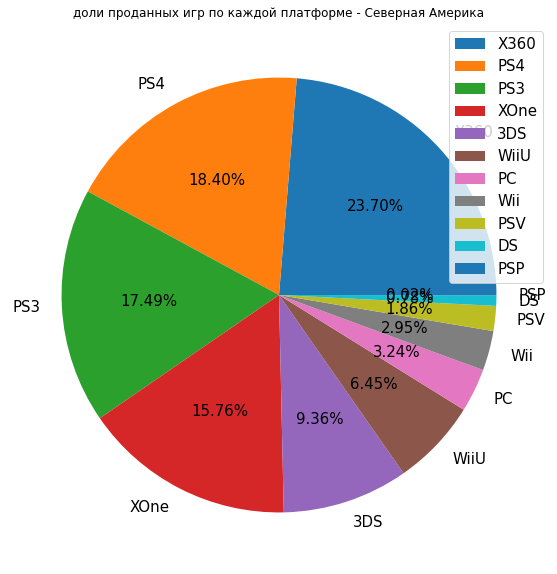


доля продаж игр по платформе X360: 23.70%
доля продаж игр по платформе PS4: 18.40%
доля продаж игр по платформе PS3: 17.49%
доля продаж игр по платформе XOne: 15.76%
доля продаж игр по платформе 3DS: 9.36%
доля продаж, которая приходится на TOP-5 платформ: Северная Америка 84.71%

Популярные жанры в регионе


,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19
Platform,25.38
Fighting,19.79
Racing,17.22
Adventure,8.92


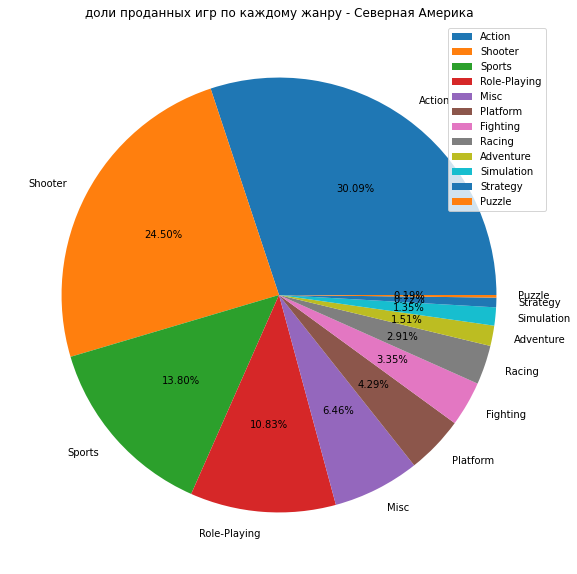


доля продаж игр по жанру Action: 30.09%
доля продаж игр по жанру Shooter: 24.50%
доля продаж игр по жанру Sports: 13.80%
доля продаж игр по жанру Role-Playing: 10.83%
доля продаж игр по жанру Misc: 6.46%
доля продаж, которая приходится на TOP-5 популярных жанров: Северная Америка 85.68%

Возрастной рейтинг и продажи


,na_sales
id_rating,
1_E,114.37
2_E10+,75.70
3_T,66.02
4_M,231.57
unknown,103.31


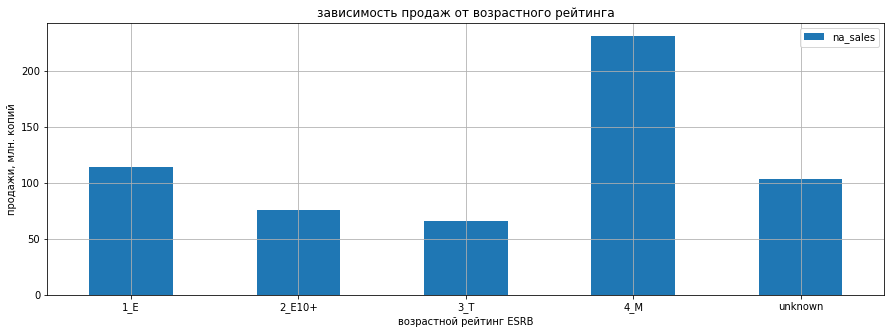

In [68]:
region_user('na_sales')

Итого:
1) Наиболее популярной платформой в Северной Америке является на актуальный период X360 (23,70%). Далее идут PS4, PS3, XOne и 3DS. Суммарно на эти пять платформ приходится 84,71% продаж игр.  
2) Самый популярный жанр в Северной Америке - Action (30,09% продаж). Ещё 4 самых популярных жанра - Shooter (24.50%), Sports (13.80%), Role-Playing (10,83%), Misc (6,46%). На продажи игр этих 5 жанров приходится 85.68%  
3) Наиболее популярными являются игры с возрастными рейтингом M (для взрослых - для лиц старше 17 лет) и E(для всех - старше 6 лет). С уверенностью говорить, что рейтинг непосредственно влияет на продажи нельзя. Само по себе увеличение категории возрастного рейтинга не показывает зависимости с продажами. Есть ли какая-то другая зависимость (например, что конкретная группа - в данном случае M - даст однозначно больше продаж), нельзя однозначно утверждать.

Вывод: Для Северной Америки типичный пользователь - это тот, кто играет на X360 (реже PS4) в игры жанра Action или Shooter c возрастным рейтингом M (для лиц старше 17 лет)


### Портрет пользователя в Европе


Популярные платформы:


,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64
PC,37.76
WiiU,25.13
Wii,11.92
PSV,11.36


Топ-5 популярных платформ: Европа : PS4, PS3, X360, XOne, 3DS



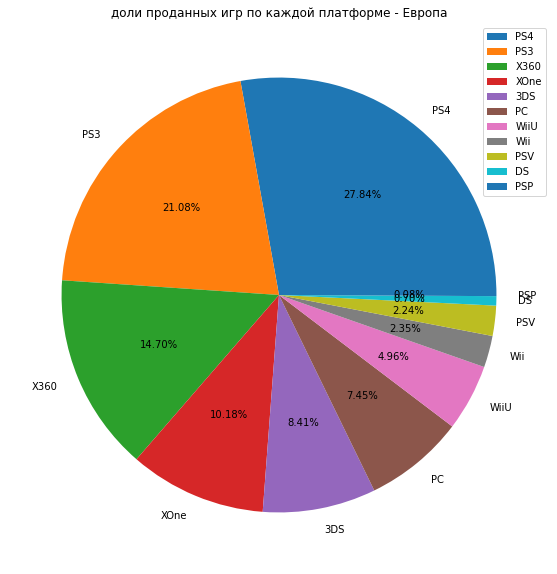


доля продаж игр по платформе PS4: 27.84%
доля продаж игр по платформе PS3: 21.08%
доля продаж игр по платформе X360: 14.70%
доля продаж игр по платформе XOne: 10.18%
доля продаж игр по платформе 3DS: 8.41%
доля продаж, которая приходится на TOP-5 платформ: Европа 82.22%

Популярные жанры в регионе


,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29
Misc,26.32
Platform,21.41
Simulation,14.55
Fighting,10.79


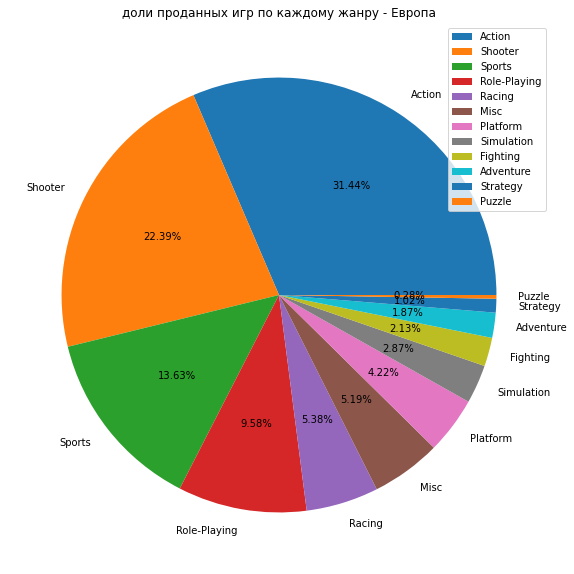


доля продаж игр по жанру Action: 31.44%
доля продаж игр по жанру Shooter: 22.39%
доля продаж игр по жанру Sports: 13.63%
доля продаж игр по жанру Role-Playing: 9.58%
доля продаж игр по жанру Racing: 5.38%
доля продаж, которая приходится на TOP-5 популярных жанров: Европа 82.42%

Возрастной рейтинг и продажи


,eu_sales
id_rating,
1_E,113.03
2_E10+,55.37
3_T,52.96
4_M,193.96
unknown,91.50


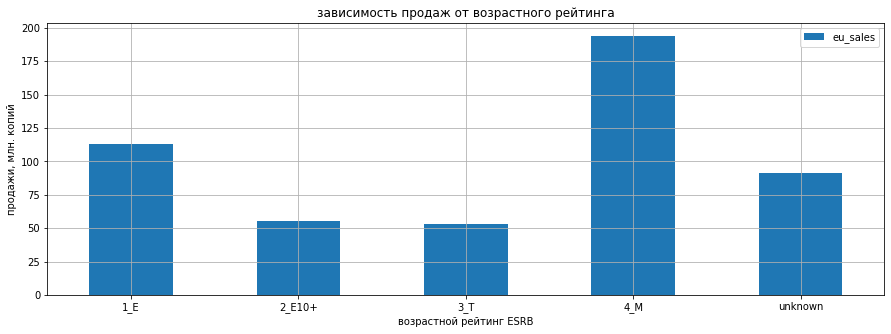

In [69]:
region_user('eu_sales')

Итого:
1) Самой популярной платформой в плане продаж игр в Европе в течение последних 4-5 лет является PS4 (27.84%). Недалеко отстают PS3 и X360 (21.08% и 14.70% соответственно). Также в ТОП-5 входят Xone и 3DS.Всего на эти платформы приходится 82.22% всех продаж.   
2) Самым популярным жанром последних 4-5 лет является Action (31.44%). Также в ТОП-5 входят Shooter (22.39%), Sports(13.63%), Role-Playing (9.58%) и Racing (5.38%). На игры этих пяти жанров приходится 82.42%. Кроме того, стоит отметить, что вкусовые предпочтения у европейских пользователей очень схожи с американскими.  
3) Наиболее популярными являются также игры с возрастными рейтингом M (для взрослых - для лиц старше 17 лет) и E(для всех - старше 6 лет). Нужно также помнить, что ESRB предназначается для игр для США и Канады, поэтому для Европы реальная картина по возрастному рейтингу может быть иной во-первых, за счёт игр, которые не маркированы ESRB. Мы видим, что порядка 90млн. копий проданных игр в Европе не имеют рейтинга ESRB. Также у Европы может быть своя возрастная школа и критерии, по которым относить игры к той или иной группе.

Вывод: Европейский типичный пользователь (в отличие от Американского) предпочитает PS4 (реже PS3), игры жанров в основном Action и чуть реже Shooter c возрастным рейтингом M (для лиц старше 17 лет) по версии ESRB (на основе проставленных рейтингов)


### Портрет пользователя в Японии


Популярные платформы:


,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01
PSP,10.47
DS,3.72
Wii,3.39
X360,1.57


Топ-5 популярных платформ: Япония : 3DS, PS3, PSV, PS4, WiiU



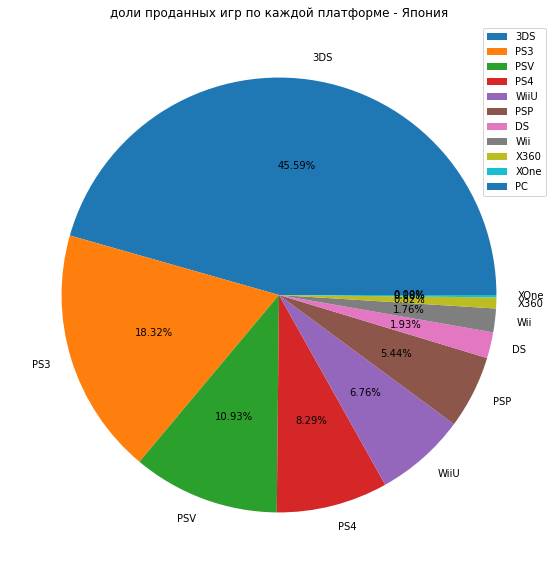


доля продаж игр по платформе 3DS: 45.59%
доля продаж игр по платформе PS3: 18.32%
доля продаж игр по платформе PSV: 10.93%
доля продаж игр по платформе PS4: 8.29%
доля продаж игр по платформе WiiU: 6.76%
доля продаж, которая приходится на TOP-5 платформ: Япония 89.88%

Популярные жанры в регионе


,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44
Shooter,9.23
Platform,8.63
Adventure,8.24
Sports,8.01


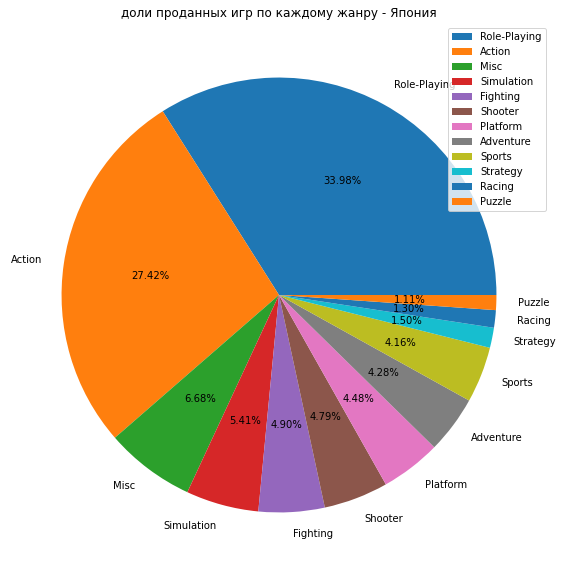


доля продаж игр по жанру Role-Playing: 33.98%
доля продаж игр по жанру Action: 27.42%
доля продаж игр по жанру Misc: 6.68%
доля продаж игр по жанру Simulation: 5.41%
доля продаж игр по жанру Fighting: 4.90%
доля продаж, которая приходится на TOP-5 популярных жанров: Япония 78.38%

Возрастной рейтинг и продажи


,jp_sales
id_rating,
1_E,28.33
2_E10+,8.19
3_T,26.02
4_M,21.20
unknown,108.84


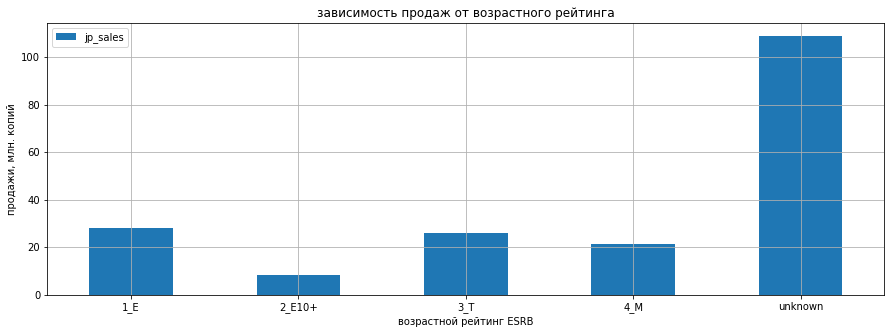

In [70]:
region_user('jp_sales')

Совершенно непохожая на Европу и Америку картина в Японии:
1) Самой популярной платформой в плане продаж игр в Японии в течение последних 5 лет является 3DS (аж 45.59% проданных копий игр). Далее в рейтинге идут PS3 (18.32%), PSV, PS4 и WiiU. Всего на эти 5 платформ приходится 89.88% всех продаж.  
2) Самым популярным жанром последних 4-5 лет является Role-Playing (33.98%). Также в ТОП-5 входят Action (27.42%), Misc(6.68%), Simulation (5.41%) и Fighting (4.90%). На игры этих пяти жанров приходится 75,55%. Совершенно не совпададет с картиной в Америке и Европе  
3) С одной стороны наиболее популярными являются игры с возрастными рейтингом `E` (для всех - старше 6 лет), далее идет сразу идёт `T`(для подростков - для лиц старше 13 лет). Но мы видим, что очень большое количество игр отмечены как unknown по возрастному рейтингу. Это объясняется тем, что приличное количество игр (примерно 105-110 млн. копий игр) выпускается для Японии (или во всяком случае не для США и Канады), соответственно ESRB их не маркирует. Кроме того, у Японии может быть своя возрастная шкала и критерии, по которым игра относится к той или иной группе. Поэтому здесь выделять типичную возрастную группу нецелесообразно (данных недостаточно). Для определения типичной возрастной группы нужны дополнительные данные.

Вывод: Японский типичный пользователь (в отличие от Американского) предпочитает `3DS` (реже `PS3`), игры жанров в основном `Role-Playing` и чуть реже `Action`. Привязку к возрастному рейтингу достоверно определить невозможно по текущим данным.

## Гипотезы

### Пользовательские рейтинги игр для Xbox One и PC
Проверяем, могут ли быть одинаковыми средние пользовательские рейтинги игр для платформ Xbox One и PC.  
Гипотезы:

```
- H_0: средние пользовательские рейтинги "user_score" по платформе Xbox One ("XOne") = средние пользовательские рейтинги "user_score" по платформе PC ("PC")
- H_1: средние пользовательские рейтинги "user_score" по платформе Xbox One ("XOne") ≠ средние пользовательские рейтинги "user_score" по платформе PC ("PC")
alpha = 0,05
```


In [71]:
x_one = actual_df.query('platform == "XOne" and user_score >=0')
pc = actual_df.query('platform == "PC" and user_score >=0')

if len(x_one) == len(pc):
    equal_var = True
else:
    equal_var =  False

results = st.ttest_ind(x_one['user_score'], pc['user_score'], equal_var=equal_var)

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Т.е. в принципе есть определённая вероятность, что пользовательские оценки игр для Xbox One и PC могут быть одинаковыми

### Пользовательские рейтинги игр для игр в жанрах Action и Sports
Проверяем, будут ли разными пользовательские рейтинги для игр в жанрах Action и Sports?  
Гипотезы

```
- H_0: средние пользовательские рейтинги "user_score" в жанре Action = средние пользовательские рейтинги "user_score" в жанре Sports 
- H_1: средние пользовательские рейтинги "user_score" в жанре Action ≠ средние пользовательские рейтинги "user_score" в жанре Sports
alpha = 0,05
```
(поскольку нулевая гипотеза всегда формулируется с использованием знака равенства, то в нулевой гипотезе проверять будем именно возможность равенства средних пользовательских рейтингов по выбранным жанрам.) 

In [72]:
action = actual_df.loc[(actual_df['genre'] == 'Action') & (~actual_df['user_score'].isna())]
sports = actual_df.loc[(actual_df['genre'] == 'Sports') & (~actual_df['user_score'].isna())]

action = actual_df.query('genre == "Action" and user_score >= 0')
sports = actual_df.query('genre == "Sports" and user_score >= 0')

if len(action) == len(sports):
    equal_var = True
else:
    equal_var =  False

results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=equal_var)

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Т.е. Мы отвергаем гипотезу о том, что средние пользовательские рейтинги игр в жанрах Action и Sports могут быть равными.  Соответственно, ориентируемся на альтернативную гипотезу - средние рейтинги от пользователей в указанных жанрах с серьёзной вероятностью могут быть разными.

## Общие выводы:
При анализе и обработке исходного датасета:
- Исходный датасет охватывал период выпуска игр на различные платформы с 1980 по 2016год (за 2016 год данные ещё не полные)
- явных дубликатов не обнаружено
- во многих столбцах имелись пропуски:
    - были обработаны пропуски в столбце `name`  - в результате были убраны две строки с несколькими отсутствующими значениями (эти строки были неинформативны)
    - удалены в графе `year_of_Release` (269 строк). Информация в этих строках занимала незначительный объём в общих соответствующих суммарных значениях, поэтому их удаление некритично.
    - в столбцах `critic_score` и `user_score` имеются пропуски (8461 и 8981 строки соответственно). Просто удалить пропуски или заменить на расчётные данные нельзя, поэтому заменим на заглушки *-1*. 
    - Обнаружены пропуски и по графе `rating` - 6677. Также пропуски заменить на какие-то расчётные/ средние значеия нельзя. Поэтому в новом столбце `id_rating` (где к рейтингу добавлен числовой индекс для удобства группировки) заменены на `unknown`.
- столбцы `platform` и `genre` проверены на неявные дубликаты – таких не обнаружено
- в столбце `name` есть повторяющиеся названия игр, но их нельзя назвать неявными дубликатами, т.к. это различные версии (разного года выпуска или для разных платформ) одной и той же игры. 


Далее, во время исследовательского анализа:
- можно заметить, что количество выпускаемых игр практически постоянно росло на протяжении 1980 до 2008-2009 года. С 2000 года наблюдался резкий рост, который в 2008 году сменился аналогичным резким спадом (вероятно, отчасти сказался кризис). 2015—2016г. Находятся на уровне 2001-2002 года. Основной объём выпущенных игр приходится на 2003-2010 год. Наиболее показательные годы в датасете 2000-2016 год.  
- за всё время, которое отражено в датасете наиболее популярными платформами с точки зрения суммарных продаж копий игр были PS2, X360, PS3, Wii, DS, PS. При этом средний срок жизни платформы 10 лет. За этот период 2-3 года платформа набирает популярность, ещё через 2-3 года достигает пика, а после оставшиеся 4-5 лет продажи начинают падать.  Исключение – PC ("срок жизни" не совсем стандартный - гораздо дольше и имеет несколько периодов роста и снижения продаж (особенность специфики платформы))
-  с учётом этого в качестве актуального был взят период с 2012 по 2016 год, т.е последние 4-5 лет (2016 - неполный), когда можно увидеть, какие платформы только набирают популярность, а какие уже заканчивают свою жизнь. Наиболее популярными платформами, актуального периода и предположительно последующего  периода являются PS4, PS3, X360, 3DS (пока ещё "живет"), XOne и WiiU.
-  для большинства платформ нормальные значения по продажам отдельно взятой игры укладываются в диапазон от 0 до 1 (или  даже1,5млн. копий). У наиболее популярных платформ актуального периода ситуация следующая:
    - PS4 - от 0 до 1,74млн. копий, медиана - примерно 0,24
    - PS3 - от 0 до 1,4млн. копий, медиана - примерно 0,24
    - X360 - от 0 до 1,9млн. копий, медиана - примерно 0,25
    - XOne - от 0 до 1,55 млн. копий, медиана - примерно 0,24
    - WiiU - от 0 до 1,19млн. копий, медиана - примерно 0,21
    - 3DS - от 0,05 до 0,75 млн. копий, медиана - примерно 0,10
- можно отметить, что какой-то значимой взаимосвязи между оценками пользователей или критиков общими продажами копий игр не наблюдается.
- с точки зрения продаж наиболее популярными являются жанры Action , Sports, Shooter, Role-Playing, а также можно добавить Platform, Misc за всё время, отражённое в датасете (вместе составляют 75,10%)
- в актуальном периоде в ТОП-4 входят те же ТОП-4 жанра Action, Shooter, Role-Playing, Sports (правда в других пропорциях). Суммарно 78,05%
- самые непопулярные жанры - Puzzle, Strategy и Adventure. 
- При этом можно говорить, что наиболее "эффективным" жанром является Shooter - выпущенные за 5 лет игры занимают чуть более 8%, но по продажам игры этого жанра составляют более 21% от продаж игр всех жанров


Также были проанализированы предпочтения пользователей по регионам и сформирован условный портрет типичного пользователя (рассматривался актуальный период):
- в Северной Америке
    - наиболее популярная платформа X360 (23,70%) . Также популярны PS4, PS3, XOne и 3DS
    - наиболее популярные жанры в играх - Action (30,09% продаж), Shooter (24.50%), Sports (13.80%), Role-Playing (10,83%), Misc (6,46%). 
    - наиболее популярные игры имеют возрастной рейтинг `M` (для лиц старше 17 лет) по версии ERSB.
    - Итого: для Северной Америки типичный пользователь - это тот, кто играет на `X360` (реже `PS4`) в игры жанра `Action` или `Shooter`  c возрастным рейтингом `M` (для лиц старше 17 лет)
- в Европе:
    - наиболее популярная платформа PS4 (27.84%). Также популярны PS3 и X360 (21.08% и 14.70% соответственно). Также в ТОП-5 входят XOne и 3DS.
    - наиболее популярные жанры в играх Action (31.44%), Shooter (22.39%), Sports(13.63%), Role-Playing (9.58%) и Racing (5.38%). Структура похожа на американскую в определённой степени.
    - также наиболее популярные игры имеют возрастной рейтинг `M` (для лиц старше 17 лет) по версии ERSB. Но, нужно учитывать, что ESRB присваивается для игр, выпускаемых в Америке и в Европе может быть своя возрастная градация, также имеются игры по которым рейтинг ESRB не стоит.
    - Европейский типичный пользователь (в отличие от Американского) предпочитает  `PS4` (реже `PS3`), игры жанров в основном `Action` и чуть реже `Shooter` c возрастным рейтингом `M` (для лиц старше 17 лет) по версии ESRB (на основе проставленных рейтингов)
- в Японии:
    - наиболее популярная платформа 3DS (45.59% проданных копий игр). Также в ТОП-5 входят PS3 (18.32%), PSV, PS4 и WiiU.
    - наиболее популярные жанры в играх: Role-Playing (33.98%), Action (27.42%), Misc(6.68%), Simulation (5.41%) и Fighting (4.90%). Сильное отличие по структуре от Европы и Америки
    - Так как рейтинг ESRB предназначен для США и Канады и не присваивался для многих игр, которые продавались, например только в Японии, в данных есть большое количество игр, которые не имеют рейтинга ESRB, поэтому установить типичную возрастную категорию для Японии по версии ESRB нельзя. Кроме того, в Японии может быть своя возрастная градация. Для определения типичной возрастной группы нужны дополнительные данные.
    - Японский типичный пользователь (в отличие от Американского) предпочитает `3DS` (реже `PS3`), игры жанров в основном `Role-Playing` и чуть реже `Action`. Привязку к возрастному рейтингу достоверно определить невозможно по текущим данным.


Также при проверке гипотез были сделаны следующие выводы:
- есть определённая вероятность, что пользовательские оценки игр для платформ Xbox One и PC могут быть одинаковыми
- средние рейтинги от пользователей в указанных жанрах с приличной вероятностью могут быть разными.

Также подводя итог:
На последующие периоды, в частности 2017год, при планировании продаж видео игр, рекомендуется:
- основной упор лучше делать на игры, которые предназначены на платформы PS4 и Xone. PS4 и PS3 являются довольно популярными как в целом по всем регионам, так и в отдельных регионах прочно входят в ТОП-5. А XOne набирает популярность и несёт перспективу замены X360. Нужно помнить, что время PS3 и X360 уже на исходе к концу 2016года. В последующие периоды (в ближайшие год-два) интерес к ним будет ещё меньше (скорее всего окончательно заменятся на XOne и PS4, а также новые выходящие платформы).
- основные жанры, которые стоит брать в расчёт в первую очередь - Action и Shooter (по возможности можно добавить Role-Playing).
- оценки критиков и пользователей можно учитывать, но нельзя ставить во в главу угла именно при планировании структуры продаж.
- также при планировании продаж возможно стоит учитывать региональную специфику (в той же Японии больше ориентируются на несколько другие платформы и жанры, нежели европейские или американские, хотя пересечения имеются).